<a href="https://colab.research.google.com/github/danielsneala/Examples_of_Work/blob/main/USL_Project_LearnerNotebook_FullCode%2B_282_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Helps us in analyzing and breaking down arrays. 
import numpy as np   

# Get the LinearRegression model function.
from sklearn.linear_model import LinearRegression

# Allows us to access packages to analyze data
import pandas as pd    
# Assists in displaying graphs and visualizations
import matplotlib.pyplot as plt 
%matplotlib inline 

# Allows us to make statistical analysis
import seaborn as sns

# Allows us to use the PCA function
from sklearn.decomposition import PCA

# Allows us to use the zscore function.
from scipy.stats import zscore



sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

# We import this to help us in performing Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering 

from scipy.spatial.distance import pdist  #Pairwise distribution between data points

## Data Overview

- Observations
- Sanity checks

In [ ]:
# We load the data provided to us by the Trade&Ahead firm and name it 'df'
df = pd.read_csv("stock_data.csv")

In [ ]:
# We look at the shape of the data, which appears to have 340 rows
# and 15 columns
df.shape

(340, 15)

In [ ]:
# We look a the first 5 rows of the dataset.
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


From this, we see that we have four columns which contain categorical data (Ticker Symbol, Security, GICS Sector, and GICS Sub Industry). We also see that the current prices of these stocks (as showed above) have a range from roughly 42.35 to approximately 93.94. We also see that the Volatility can be from ~1.27 to ~2.19 and that the Net Cahs flow can be positive or negative. We also see that theEstimated Shares Outstanding can be very large and the P/B Ratio also has positive and negative values. 

In [ ]:
# We look at the statistical summary of the dataset
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


From this statistical summary, we see that Ticker Symbol, Security, GICS Sector, and GICS Sub Industry lack any statistical value. This may be due to the fact that the data in these columns are object data types. We also see that the Current Price has a mean of ~80.86, with minimum being 4.5 while the maximum is ~1274.95. We also see that Volalility has a range of ~0.73 to ~1.69, with some large outliers. We also see that the Earnings Per Share has a mean of ~2.78 but has a wide range between the maximum and minimum values, indicating  outliers.We also see some negative values exist in the Price Change, Net Cash Flow, Net Income, and P/B Ratio columns. 


In [ ]:
# We look at the information regarding the data types of each rows, which may
# help us identify inconsistencies. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

From this table, we see that four of the columns have object type data, 7 columns with float type of data, and four columns with integers. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [ ]:
# This function named 'histogram_boxplot' creates a boxplot and a histogram together, so we can 
# better observe the disribution of variables and better answer the above questions.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram 

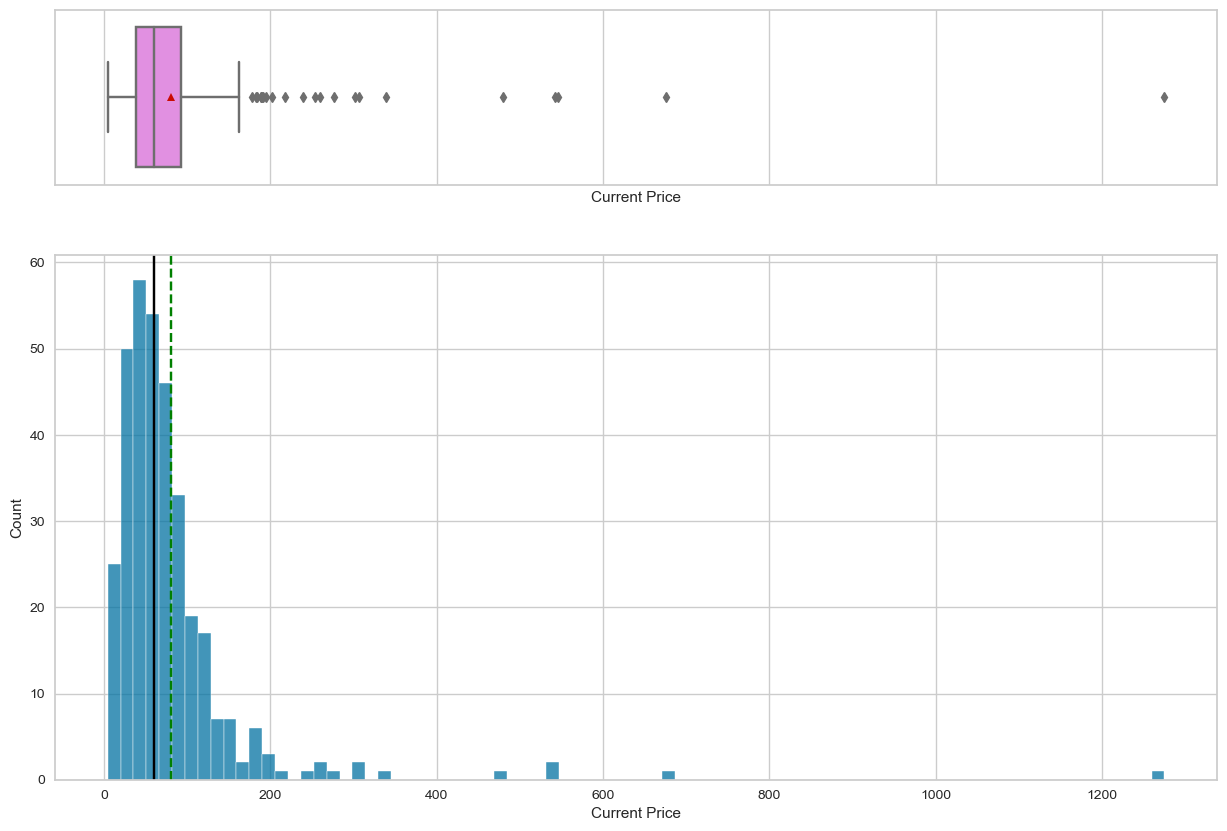

In [ ]:
# We run the histogram_boxplot() function to look at the distribution of the "Current Price" column. 
histogram_boxplot(df, "Current Price")

We see from this graph that the current prices is right skewed and that hte mean is some distance above the median. We also see that the prices have quite a few outliers, most of which are between 200 and 400.

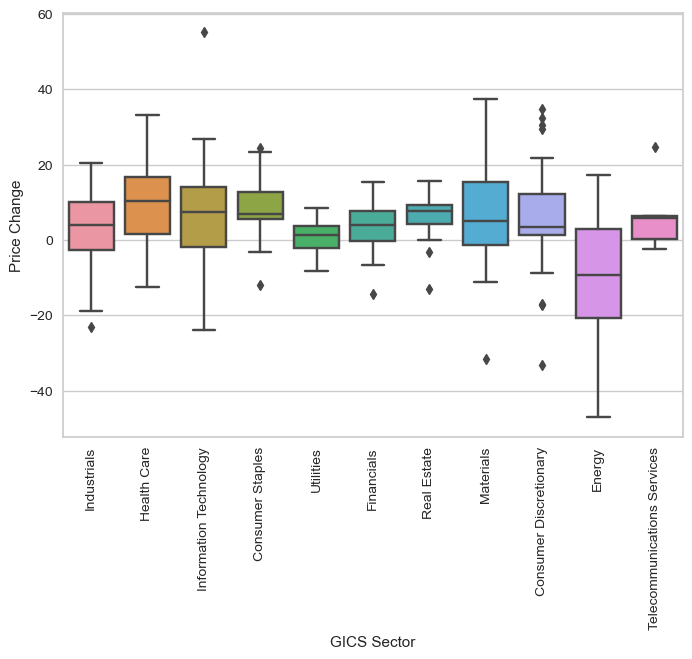

In [ ]:
# We make a boxplot graph, using the "GICS Sector" values on the x-axis, with "Price Change" on the y-axis
sns.boxplot(df, x = 'GICS Sector', y= "Price Change")
# We rotate the x-axis labels 90 degrees.
plt.xticks(rotation = 90)
# We show the graph with no coding messages. 
plt.show()

From this graph, we see that the certain industries have small changes in price change (such as utilities, Financials, and Real Estate). However, we also notice that Energy, Materials, and Information Technology has wider range of price change. The Industry that has seen the maximum price increase on average is Health Care, however. This may be due to a pandemic or it could be impacted by improvements in the field by technological advances. 

C:\Users\Neal Daniels\AppData\Local\Temp\ipykernel_19260\4104232287.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)


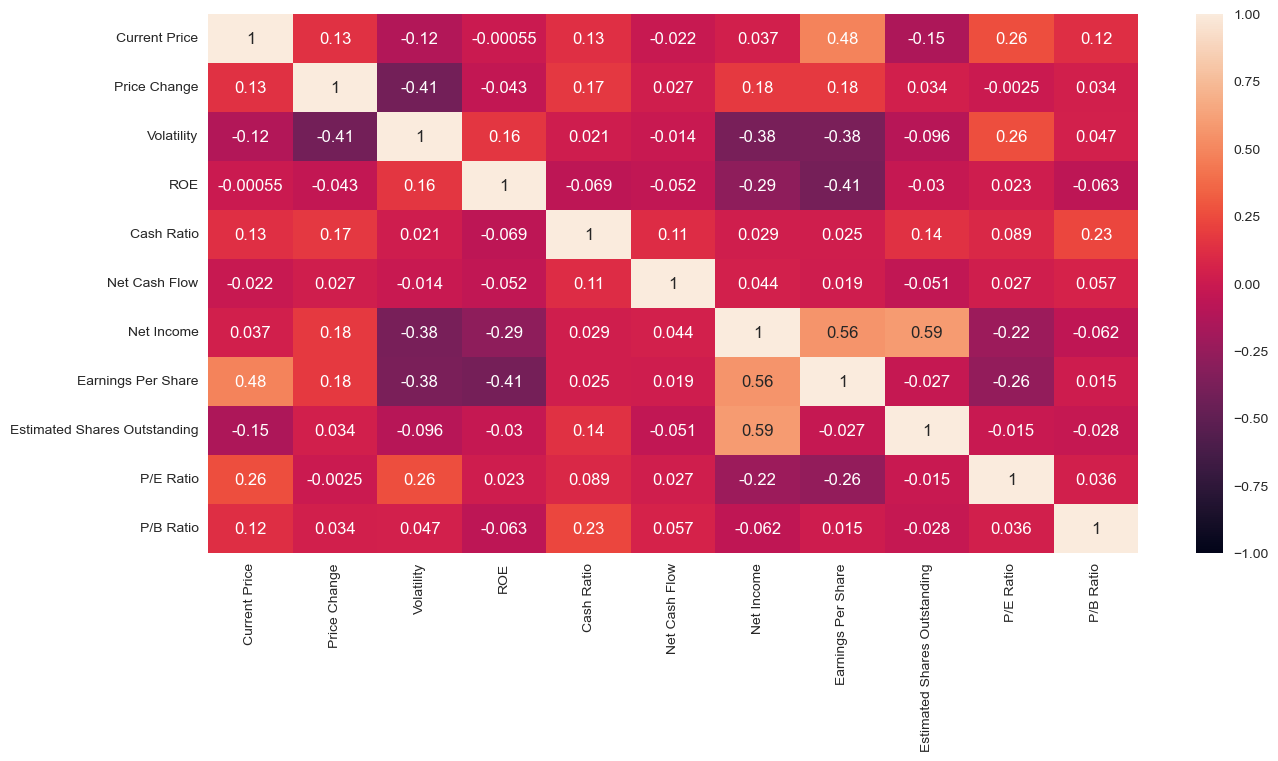

In [ ]:
# We specify the size of the graph we're about to make
plt.figure(figsize=(15, 7))
# We make a heatmap graph of the df2 dataset, with annotations. We expand the correlation to be -1 and 1 so we can see
# positive and negative correlations.
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
# Displays the graph with no coding messages. 
plt.show()


From this heatmap graph, we see that Volatility, P/E Ratio, and ROE has negative correlation with Net Income.
We also see that Net Income has a postivie correlation with Estimated Shares Outstanding and Earnings Per Share.
Its also interesting to note that P/E Ratio has a postive correlation with Volatility while having a negative correlation with Earnings Per Share. 

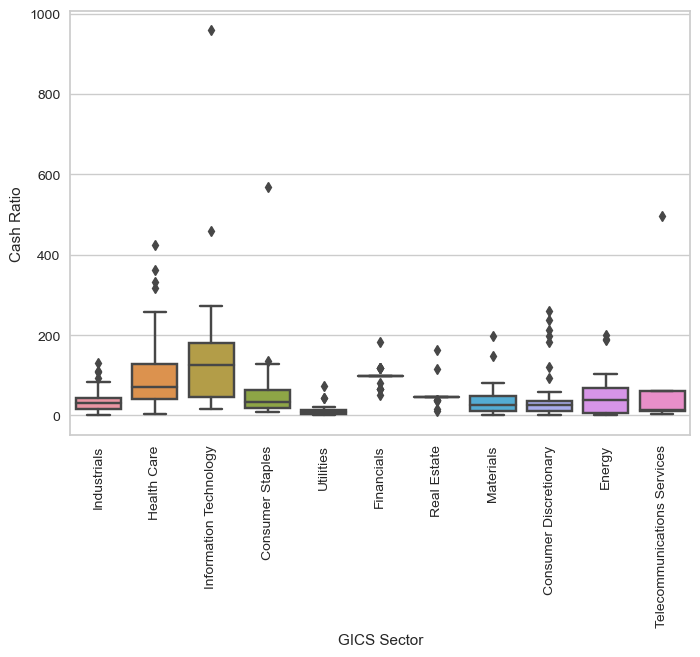

In [ ]:
# We make a boxplot graph, with "GICS Sector" on the x-axis and "Cash Ratio" on the y-axis.
sns.boxplot(df, x = "GICS Sector", y = "Cash Ratio")
# We rotate the x-axis labels 90 degrees
plt.xticks(rotation = 90)
# Show the graph with no coding messages. 
plt.show()

From this graph, we see that the average cash ratio is higher in the Information Technology GICS sector than any others (which is interesting considering some's hype about crypto-currency). We also that Utilities, Financials, and Real Estate has very minimal cash ratios, which lines up with their low price change (as indicated in the earlier graph). We also see that Health Care has the second highest cash ratio on average, followed by Energy, and Industrials.

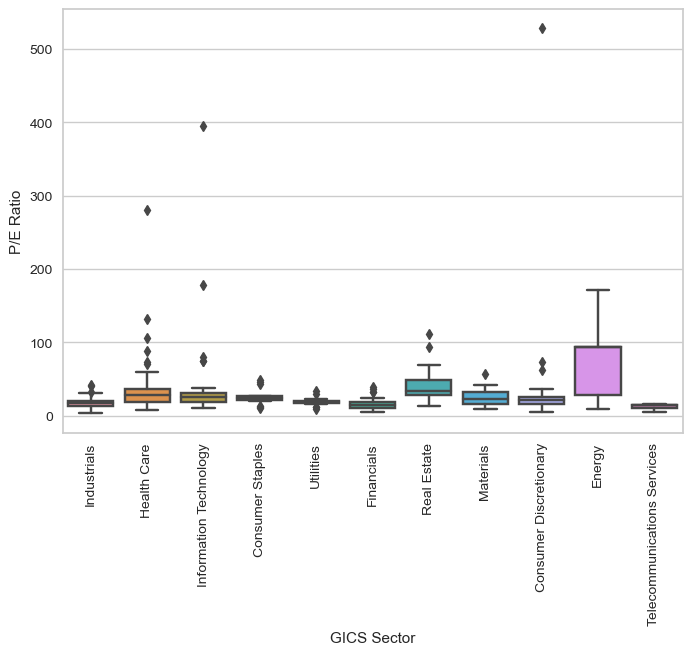

In [ ]:
# We make a Boxplot graph, looking at the "GICS Sector" column values in the x-axis while the "P/E Ratio" 
#values are in the y-axis
sns.boxplot(df, x = "GICS Sector", y = "P/E Ratio")
# We rotate the x-axis labels 90 degrees
plt.xticks(rotation = 90)
# Display the graph with no coding messages. 
plt.show()

The graph above is unfortunately too small to closely inspect. So, we're going to zoom in to get better insight.

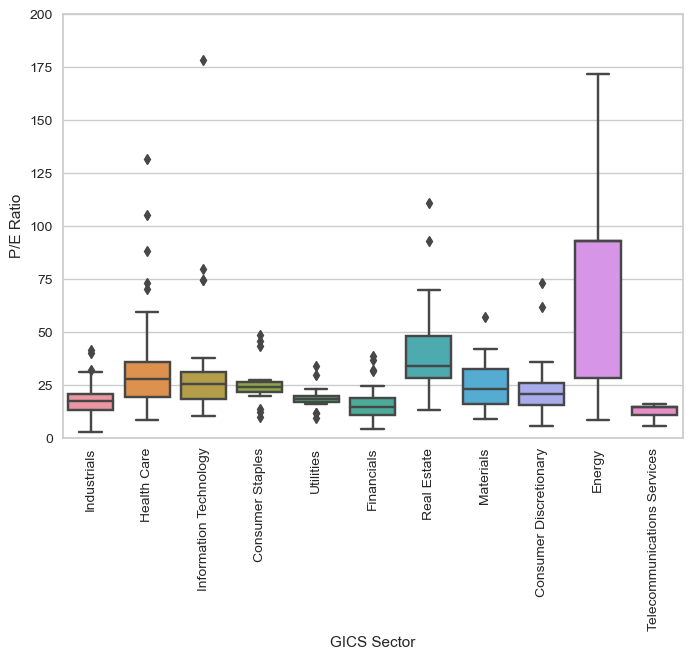

In [ ]:
# We specify the boxplot graph, as made above
sns.boxplot(df, x = "GICS Sector", y = "P/E Ratio")
# We limit the y-axis to be between 0 to 200.
plt.ylim(0, 200)
# We rotate the x-axis labels by 90 degrees. 
plt.xticks(rotation = 90)
# Shows the graph with no coding messages. 
plt.show()

From the above graph, we see that Energy Sector has a larger distribution of the P/E Ratio than its competitors. We also see that the Real Estate and Health Care comes in second and third in their height and distribution. We also see that quite a few of these sectors have outliers, mostly above the calculated maximum. However, we do have some negative outliers for the Consumer Staples and Utilities sectors.  We also see that these two sectors with Financials and Telecommunications Services have the smallest distributions.

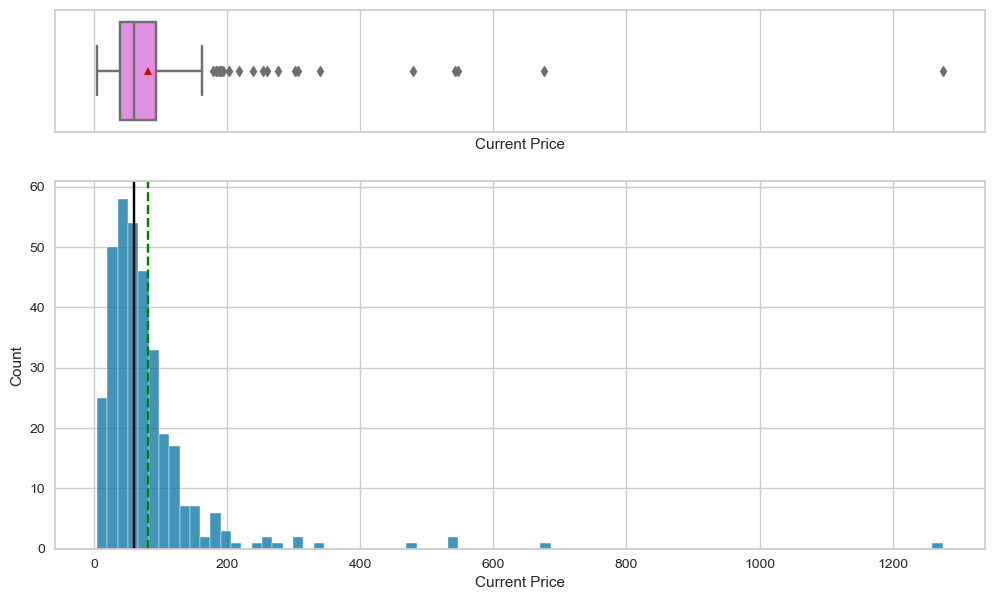

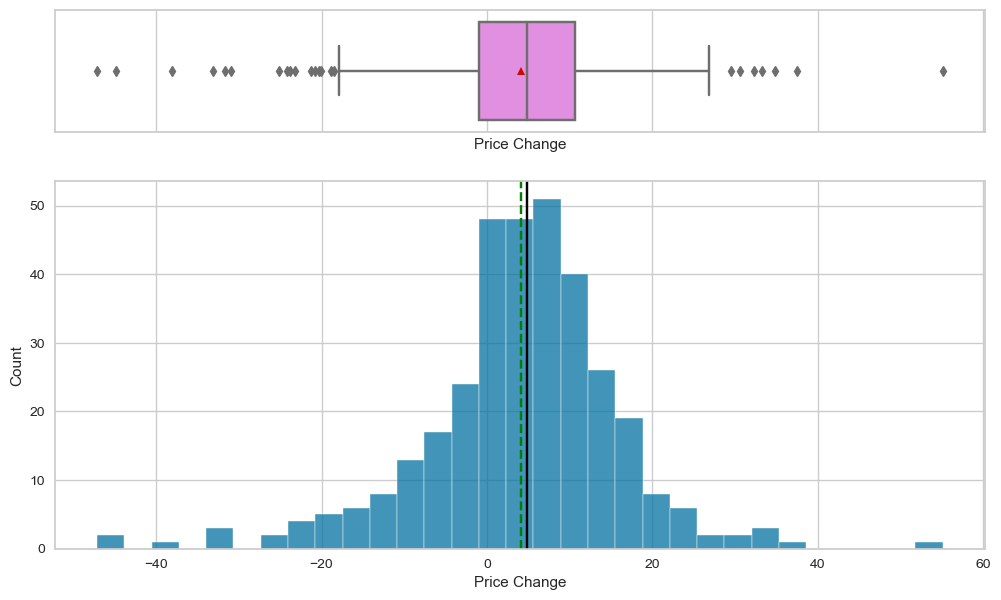

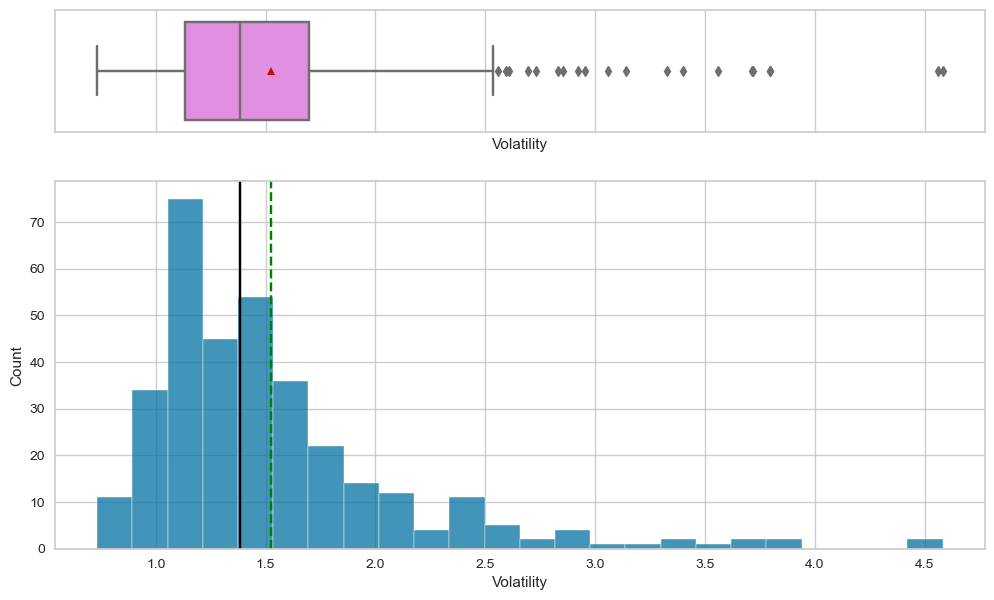

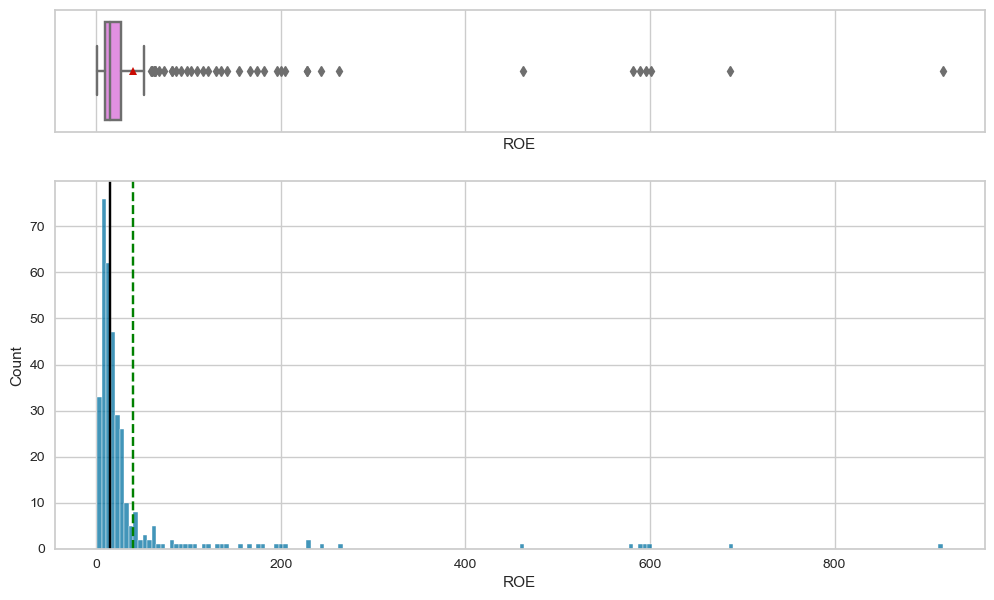

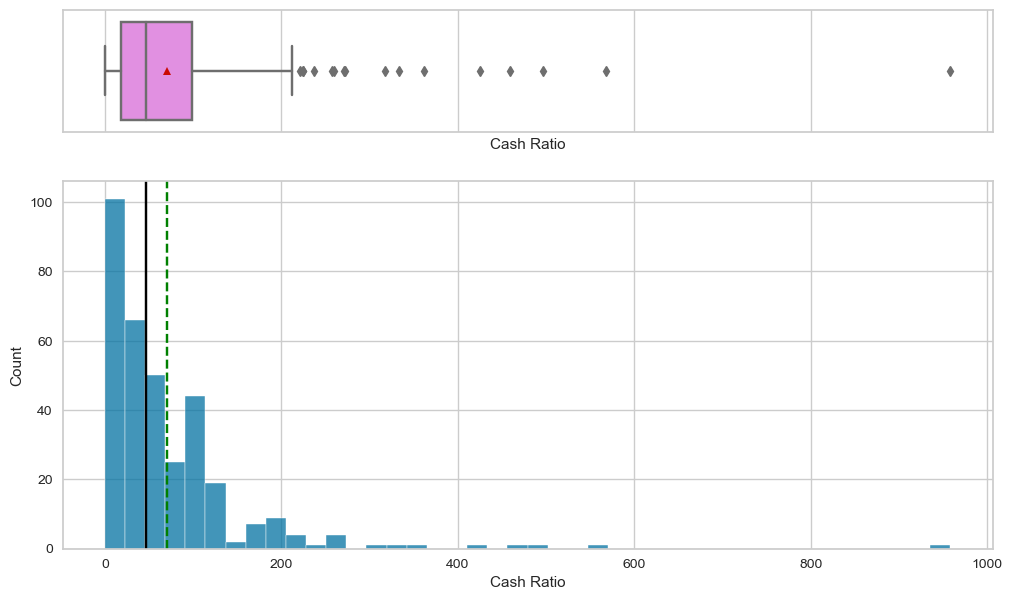

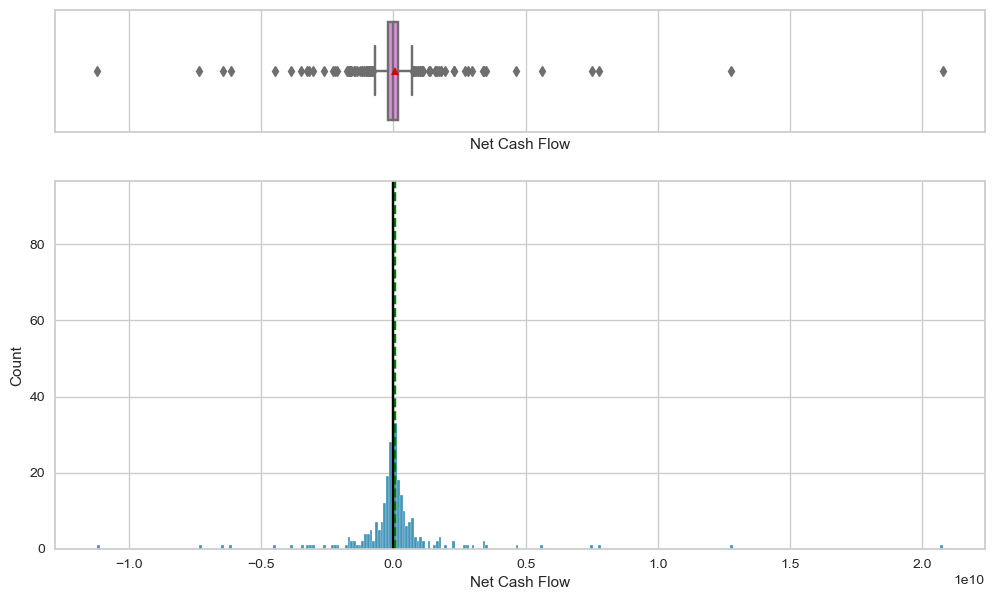

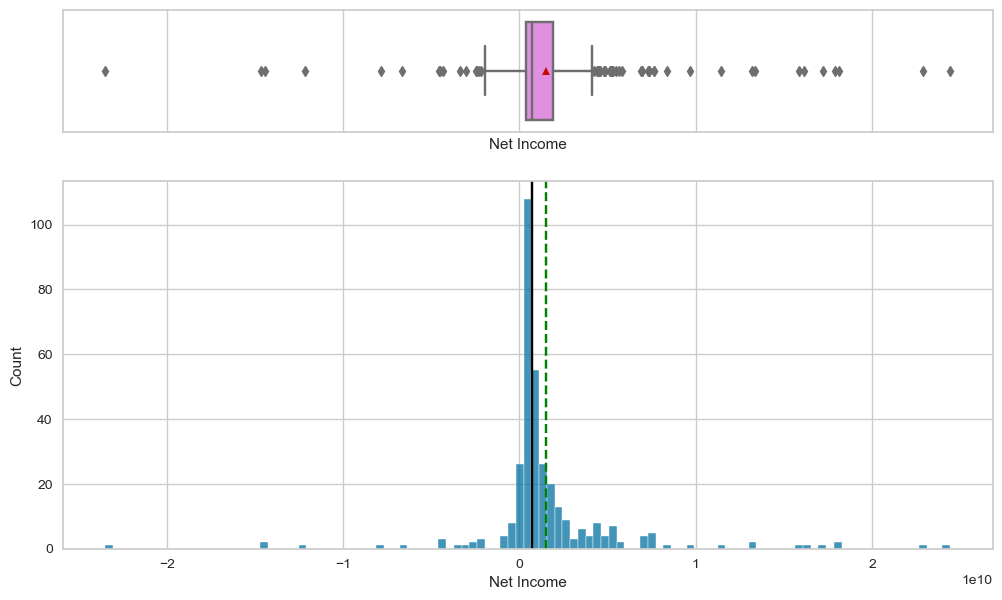

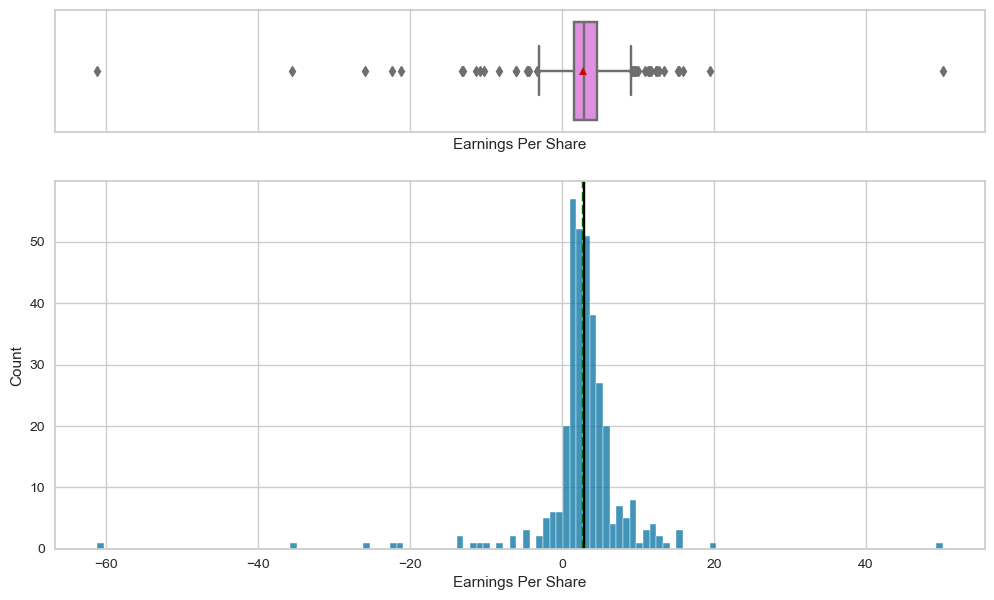

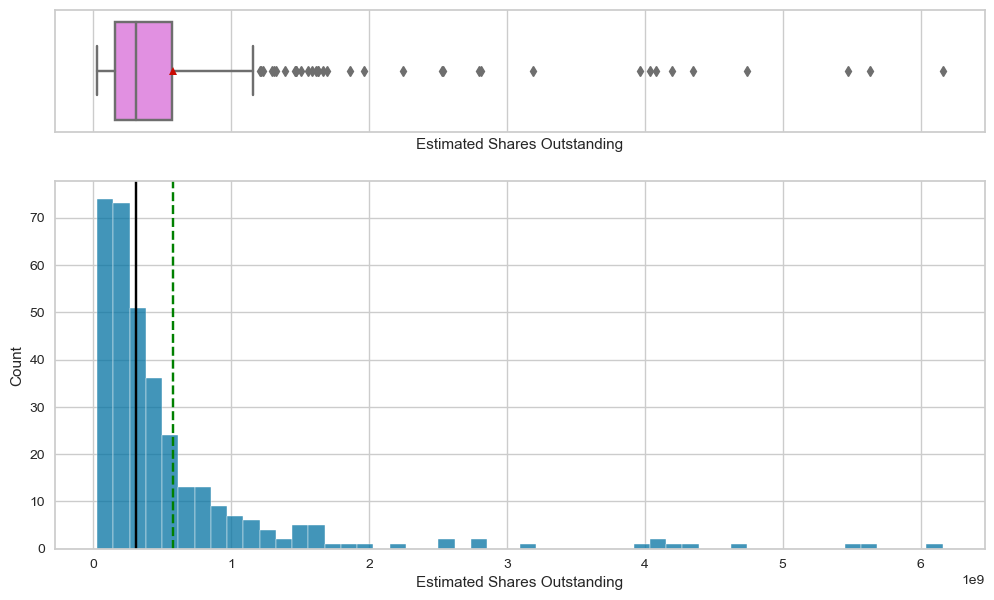

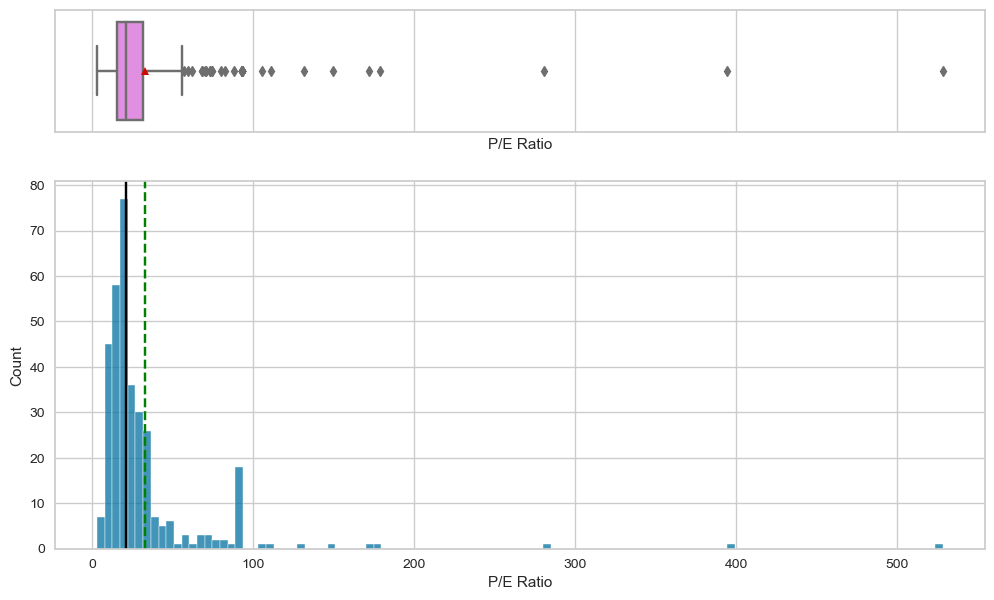

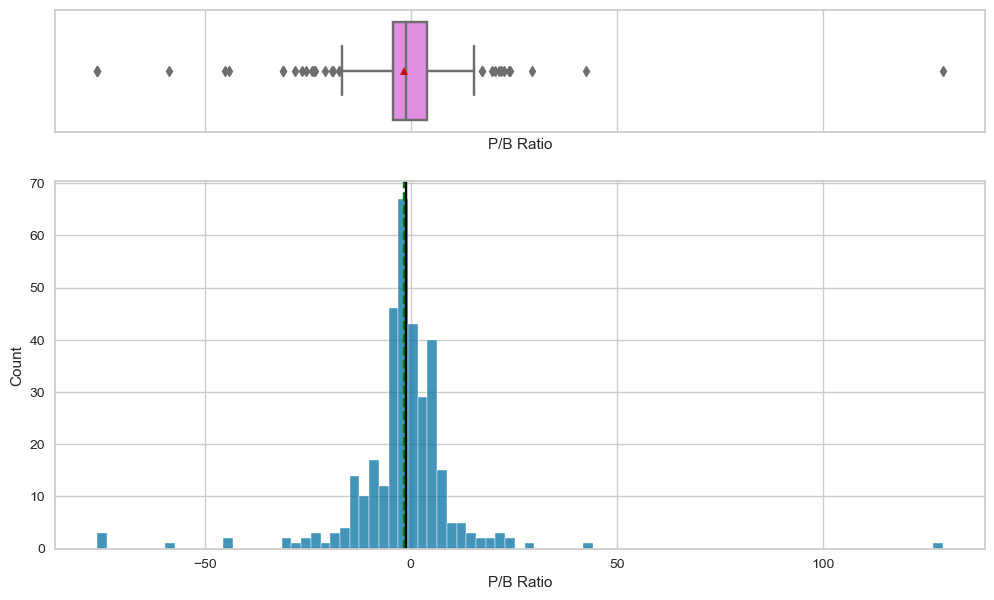

In [ ]:
# We make a variable named "num_cols", which takes all the columns of the
# 'df' dataset that are numerical. 
num_cols = df.select_dtypes(include=np.number).columns.tolist()

  

# We make a for loop, to go through each numerical column of the 'df' dataset
for feature in df[num_cols].columns:
    # We run the histogram_boxplot() function to make the graphs of each numeric column. 
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

This doesn't help us in understanding everything about the data but it does help me see that that all of the numerical columns have outliers, and some are columns are right skewed. We'll need to sort this data and clean it before we get into clustering. 

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [ ]:
# We make a copy of the data to avoid making direct changes to the read-in data
# Which we name df1
df1 = df.copy()


# We check to see if there are any duplicate rows in the dataset.
df1.duplicated().sum()

0

In [ ]:
# We check to see if there are any missing values present in each column.
# Surprisingly, we don't see any missing values. 
df1.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

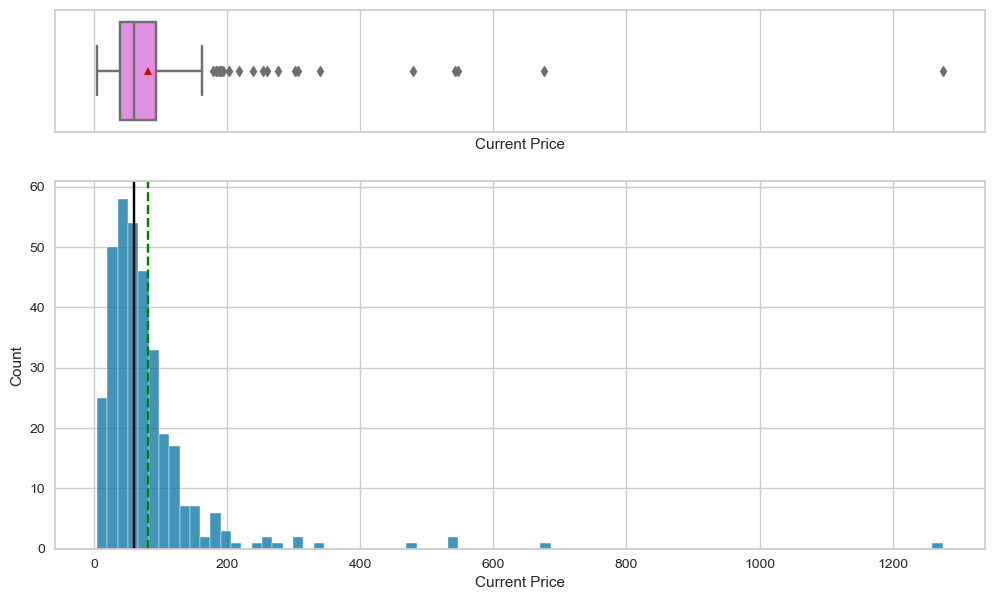

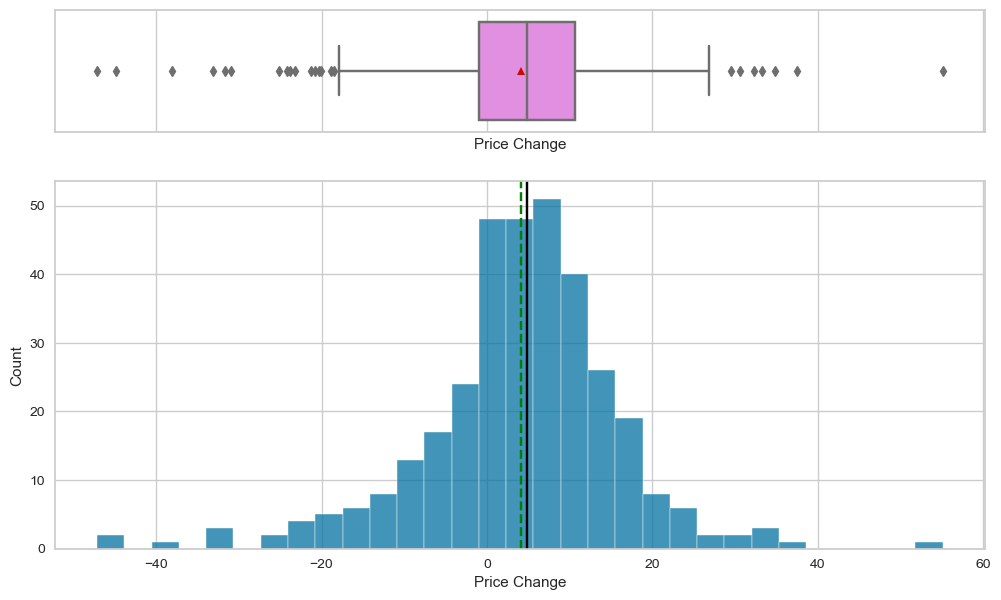

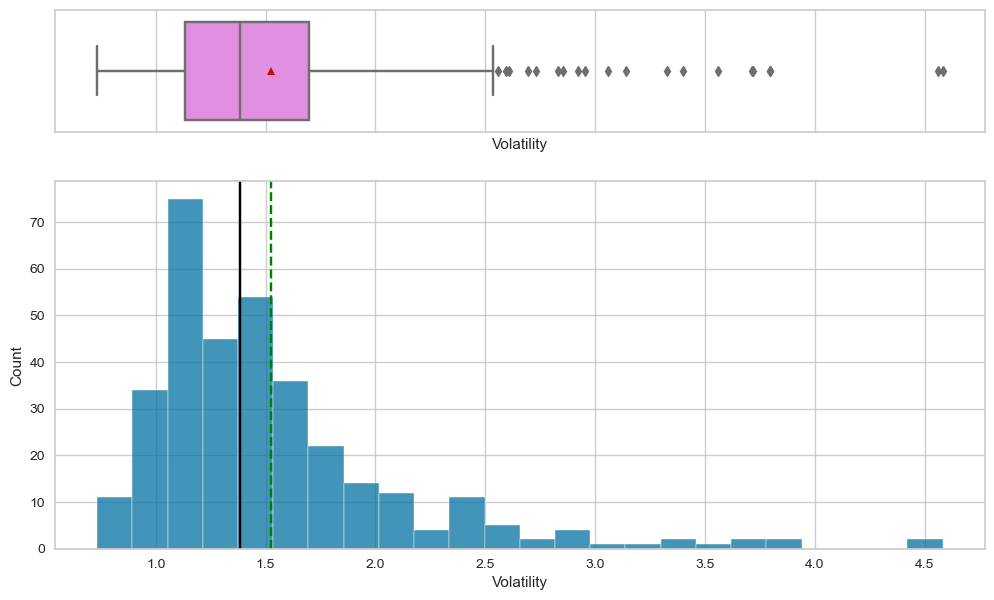

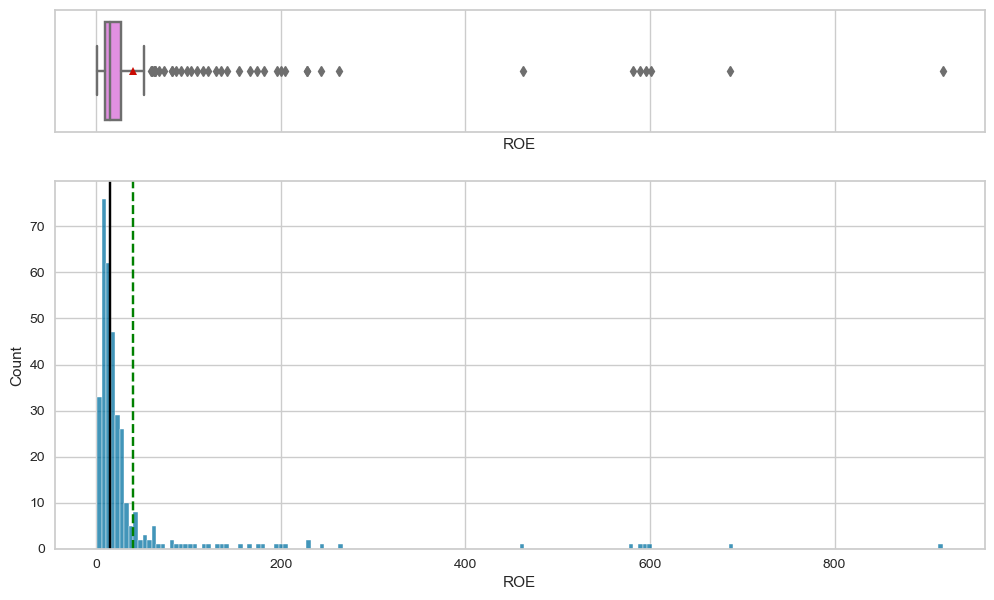

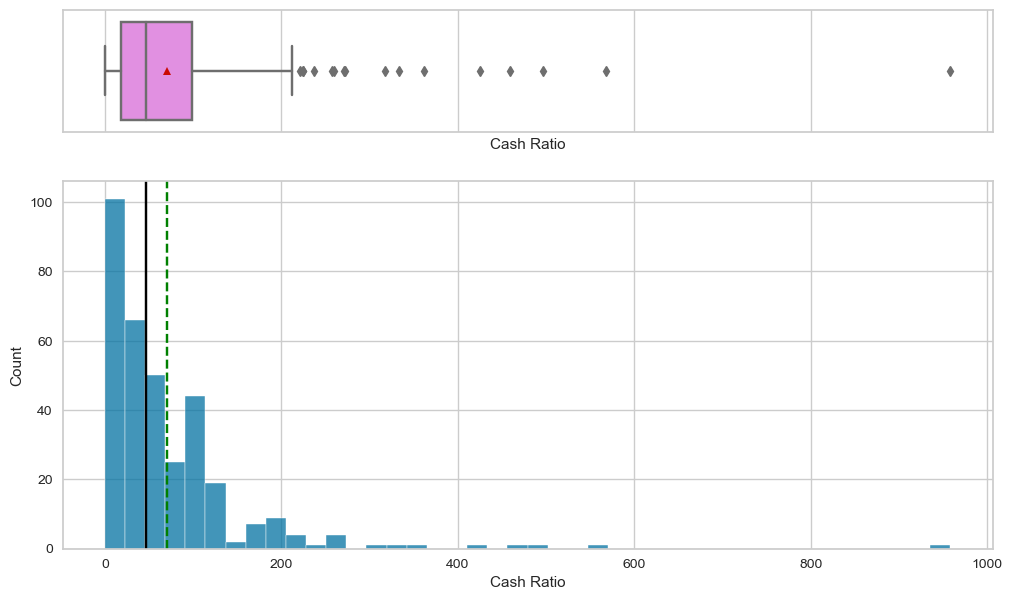

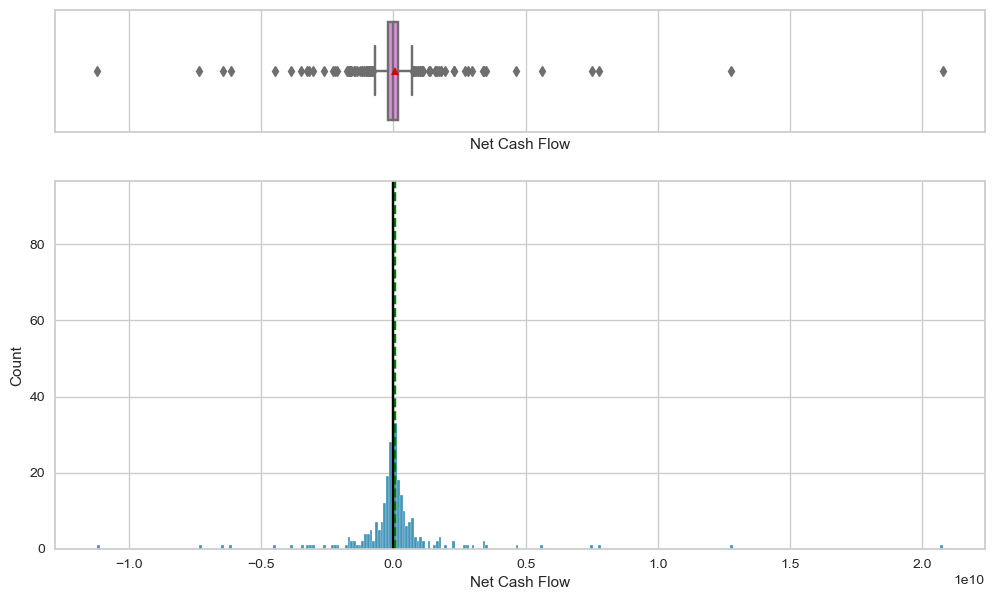

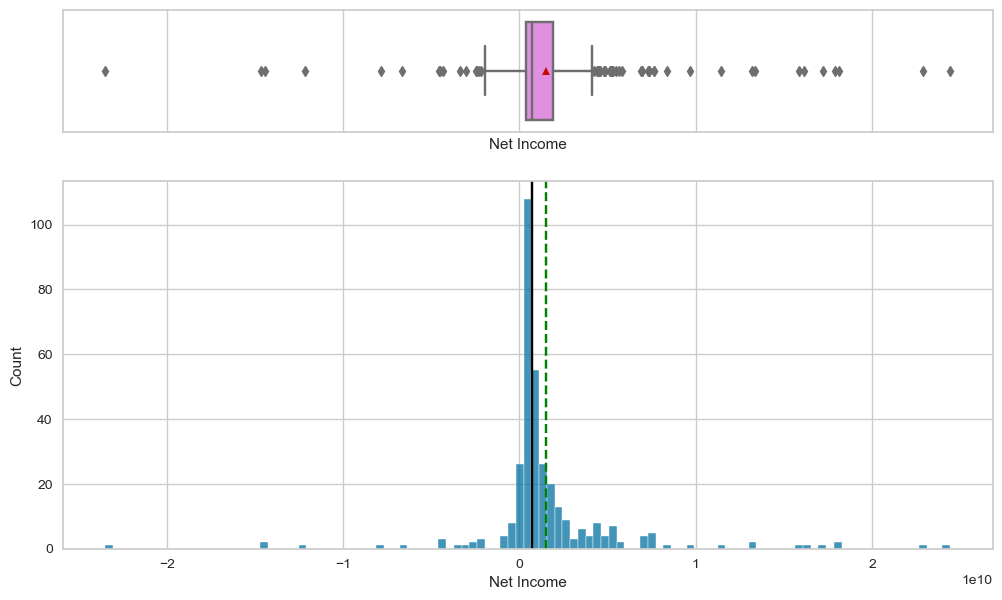

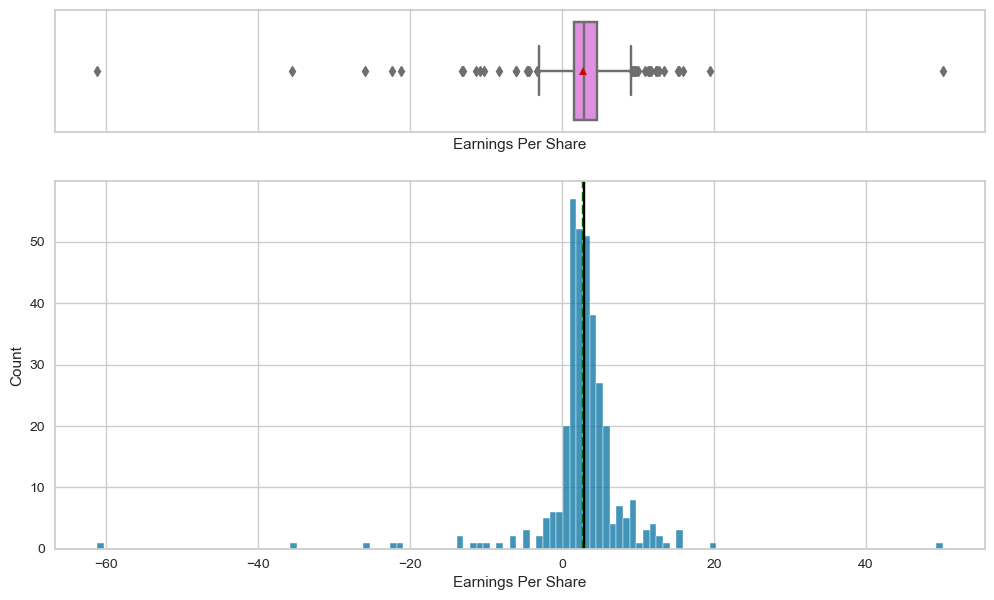

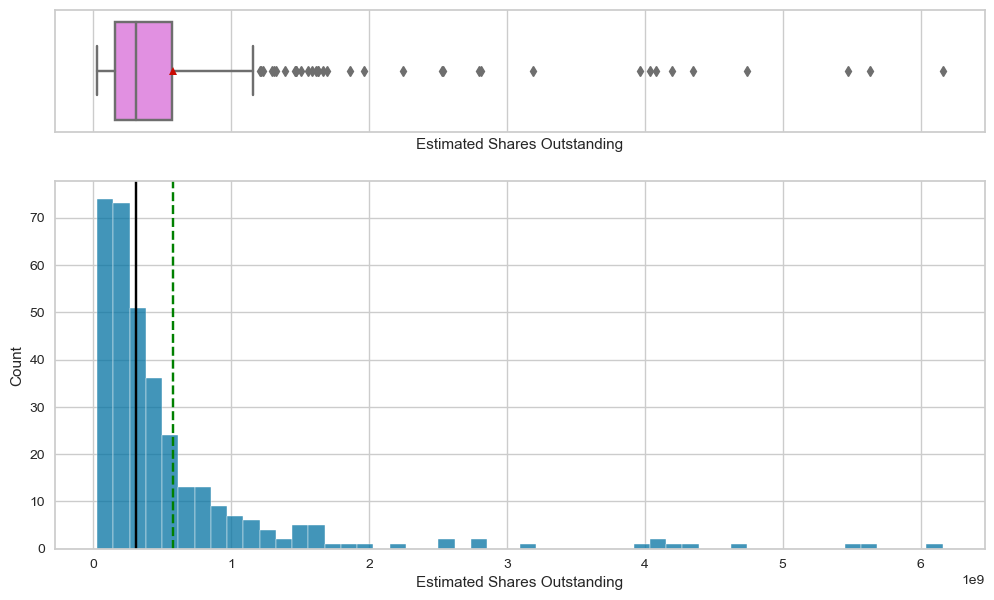

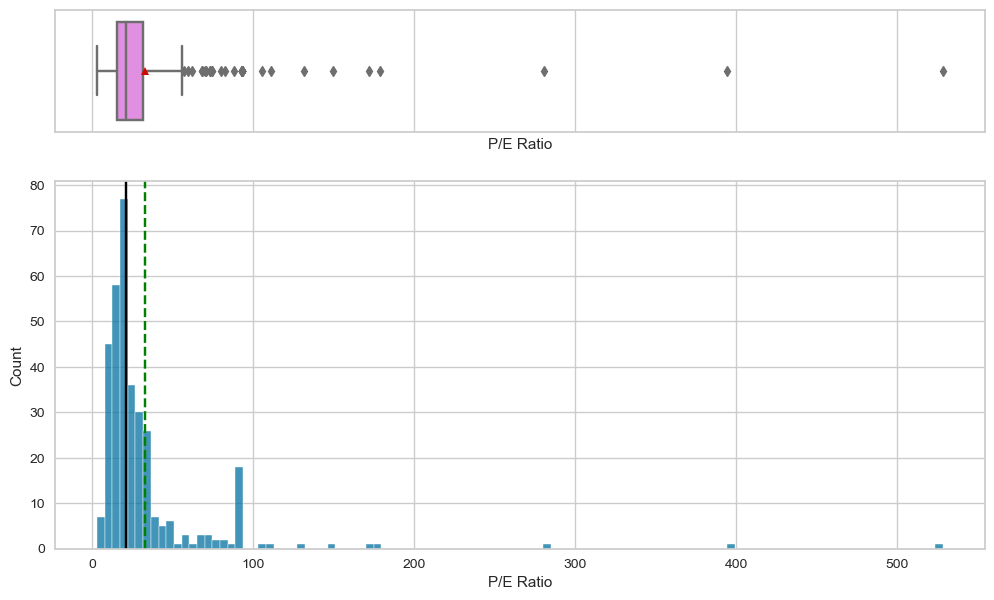

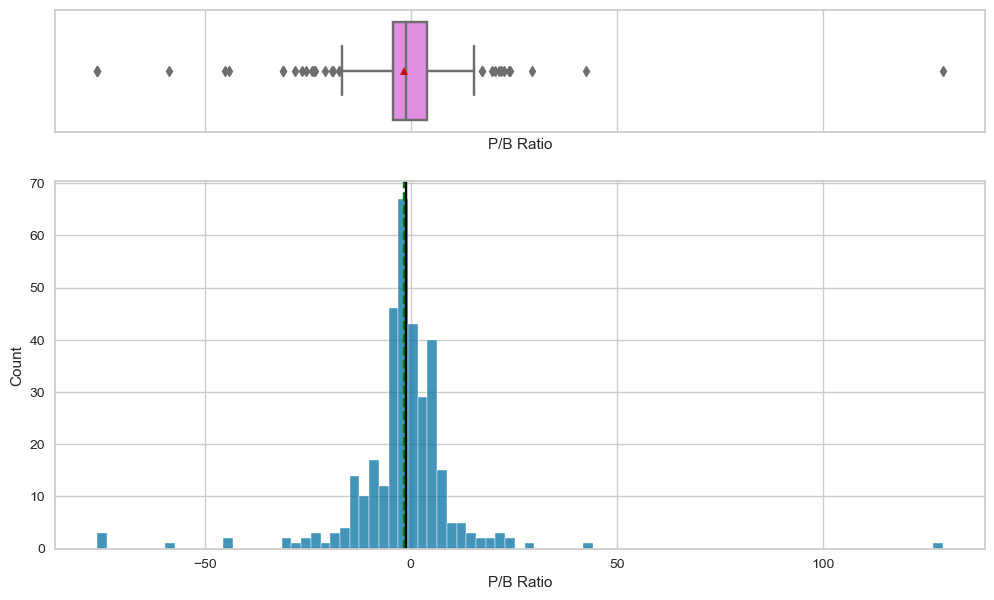

In [ ]:
# We make the histogram_boxplot graphs for all the numerical columns to ensure that the copied dataset 'df1', is identical 
# to the 'df' graphs. 

num_cols = df1.select_dtypes(include=np.number).columns.tolist()


for feature in df1[num_cols].columns:
    histogram_boxplot(df1, feature, figsize=(12, 7), kde=False, bins=None) 
 

From these graphs, we see outliers are present in nearly every column. We also see that Current Price, Volatility, Cash Ratio, Estimated Shares Outstanding, and P/E Ratio is right skewed while the other columns tends to have a normal distribution. 

In [ ]:
# We drop the "Ticker Symbol" column from the dataset as it only contains 
df1.drop("Ticker Symbol", axis =1, inplace = True)

In [ ]:
# We scale the data as unscaled data tends to mess up the entire
# conclusions we could make on how it should be clustered. The object 
# columns don't need to be scaled but we do need to scale
#the numerical columns

scaler = StandardScaler()
subset = df1[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [ ]:
df1.head()

,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


## EDA

- It is a good idea to explore the data once again after manipulating it.

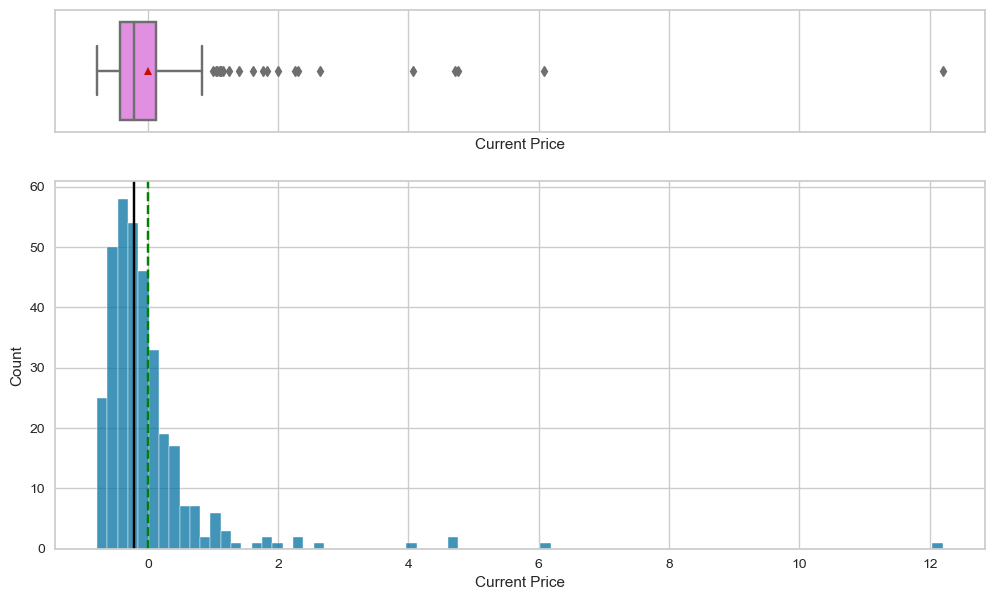

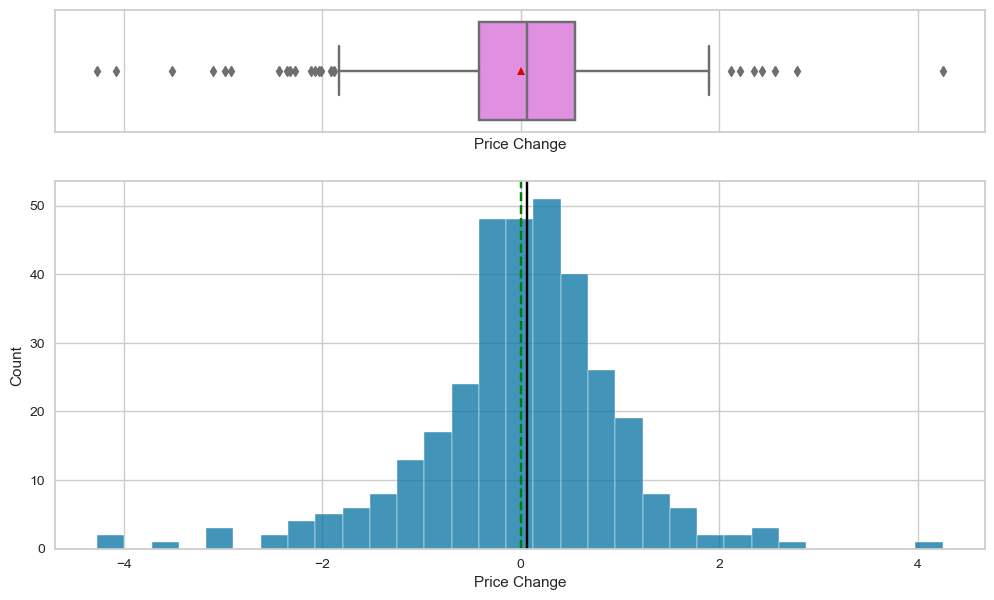

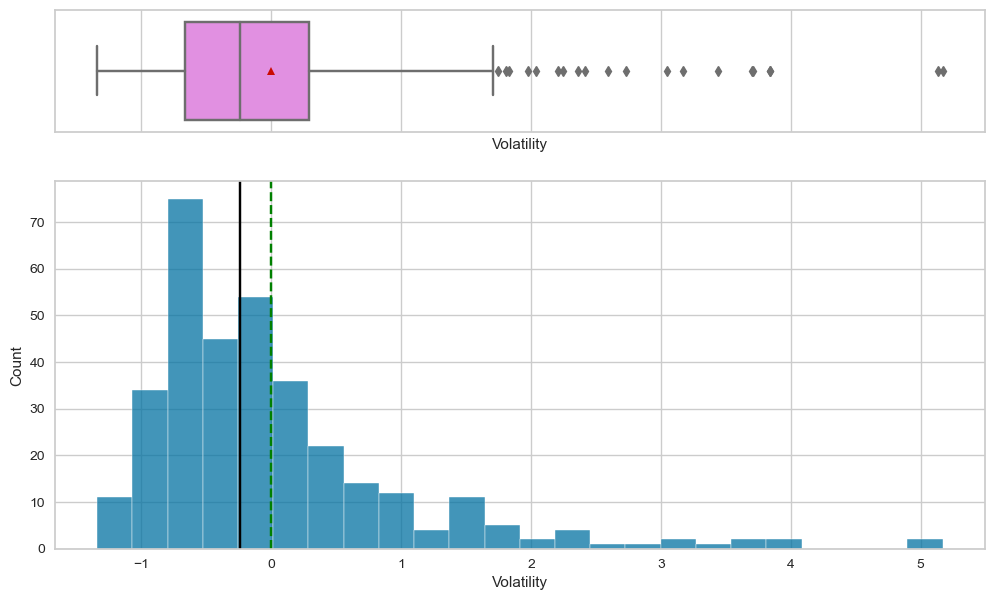

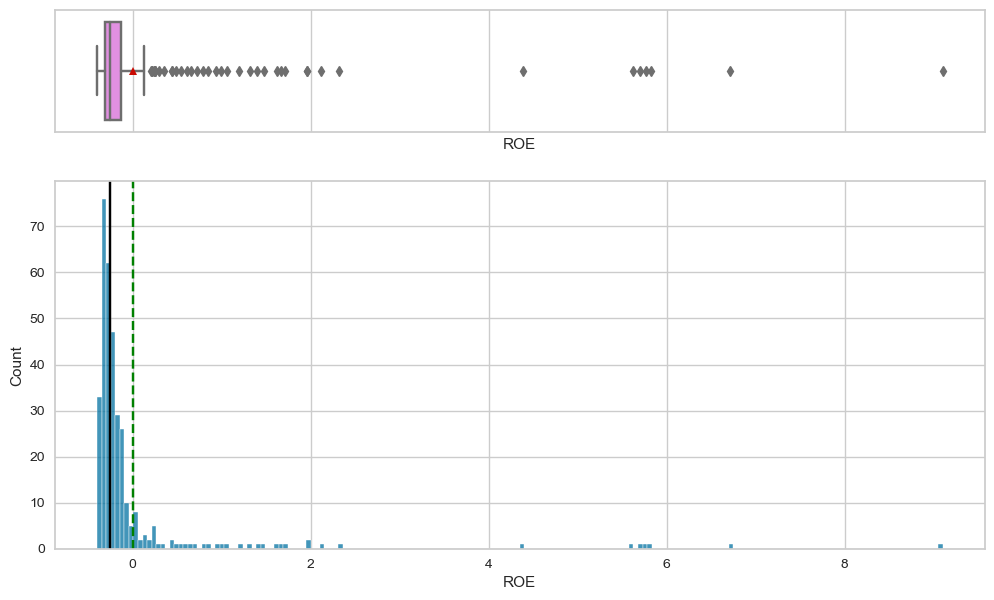

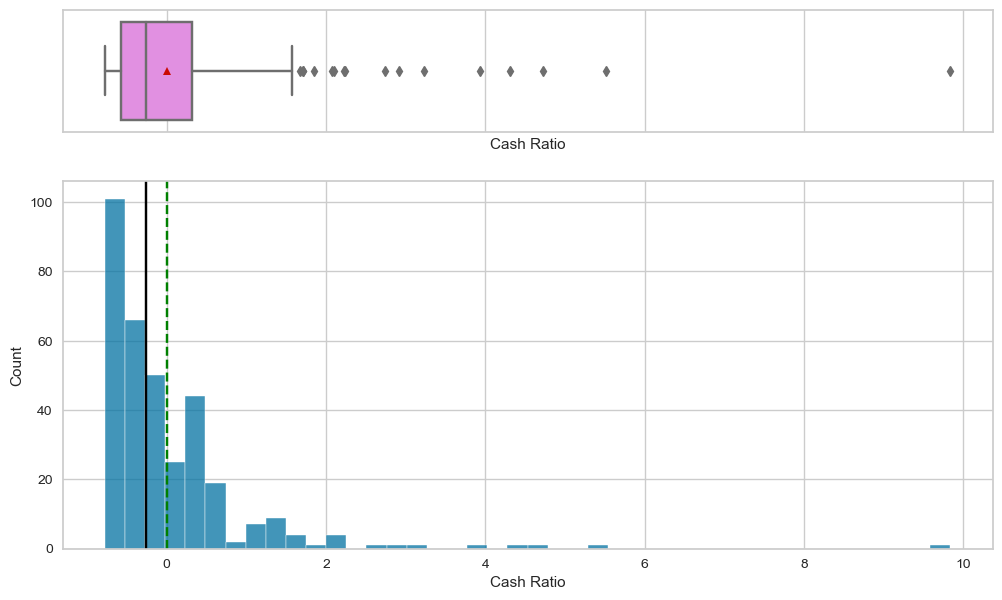

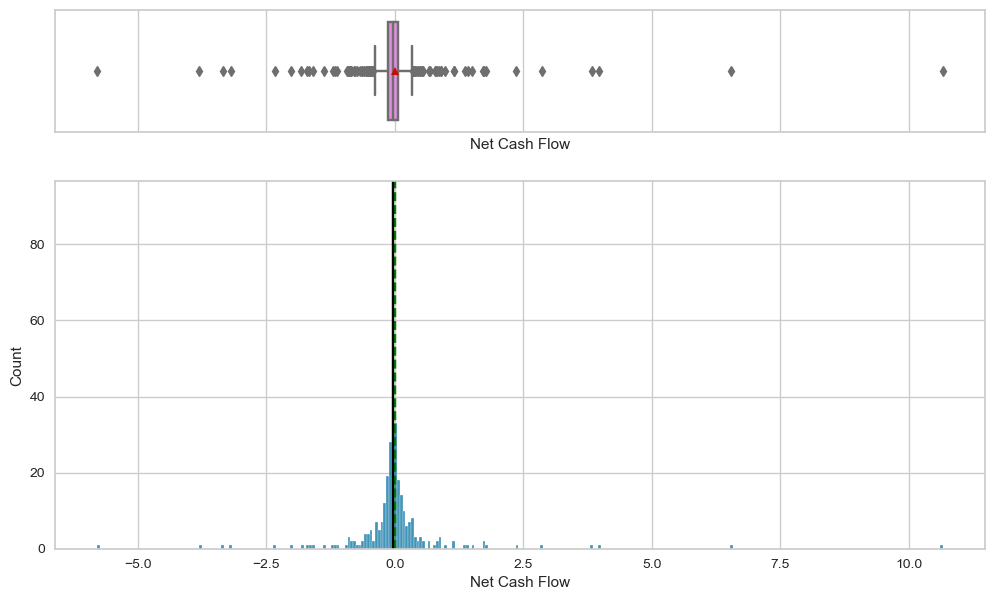

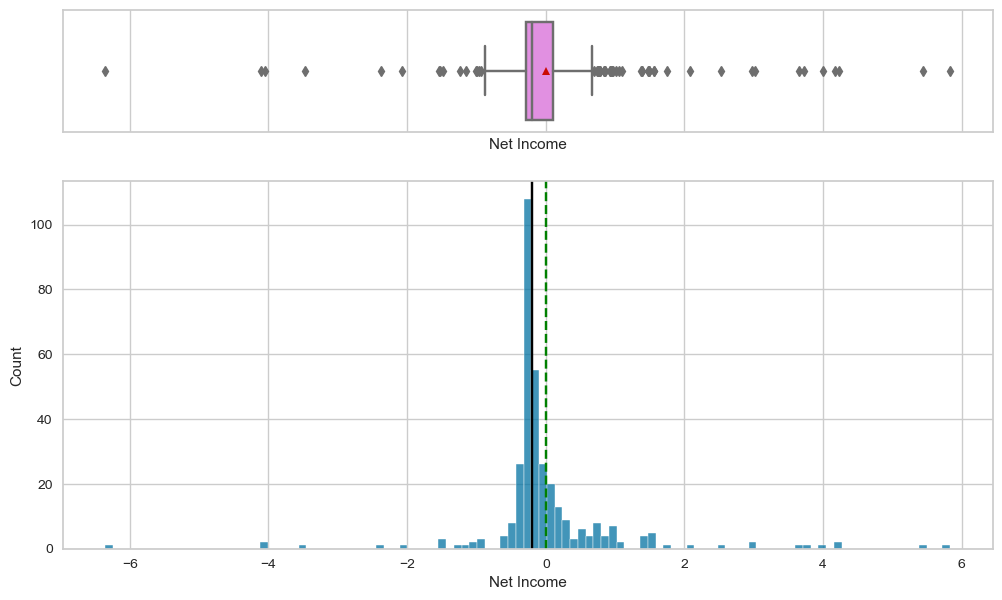

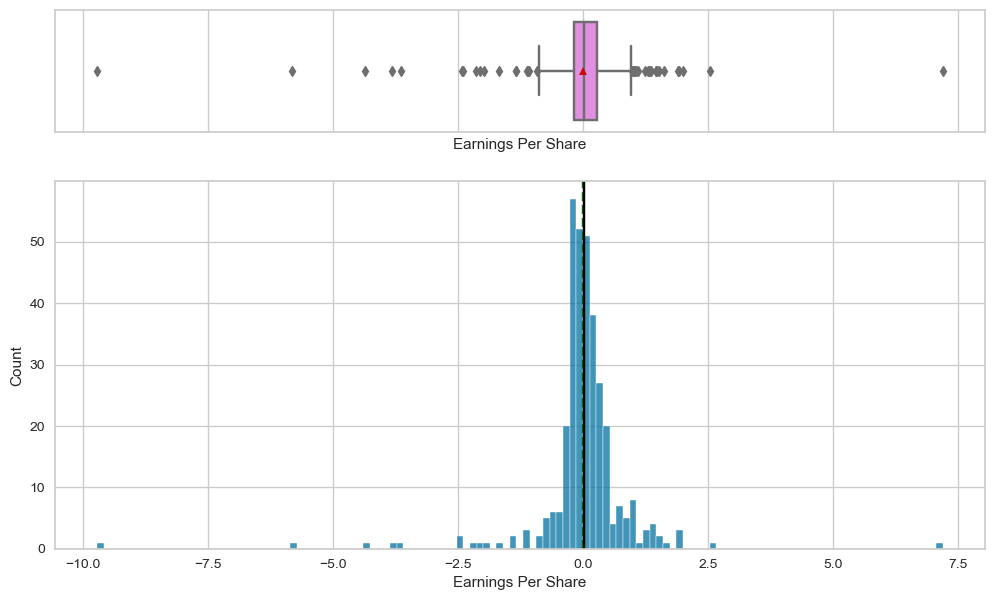

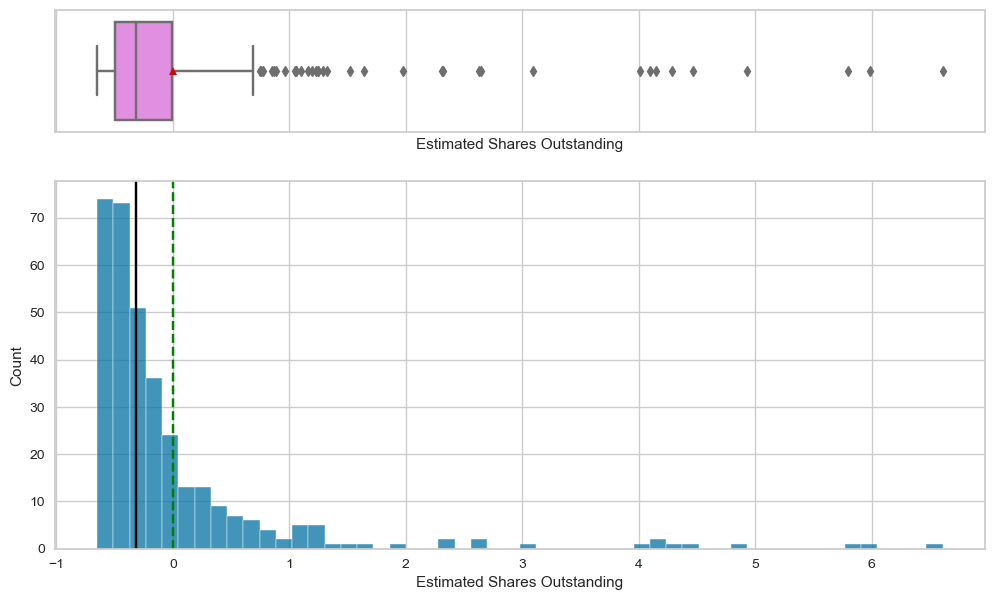

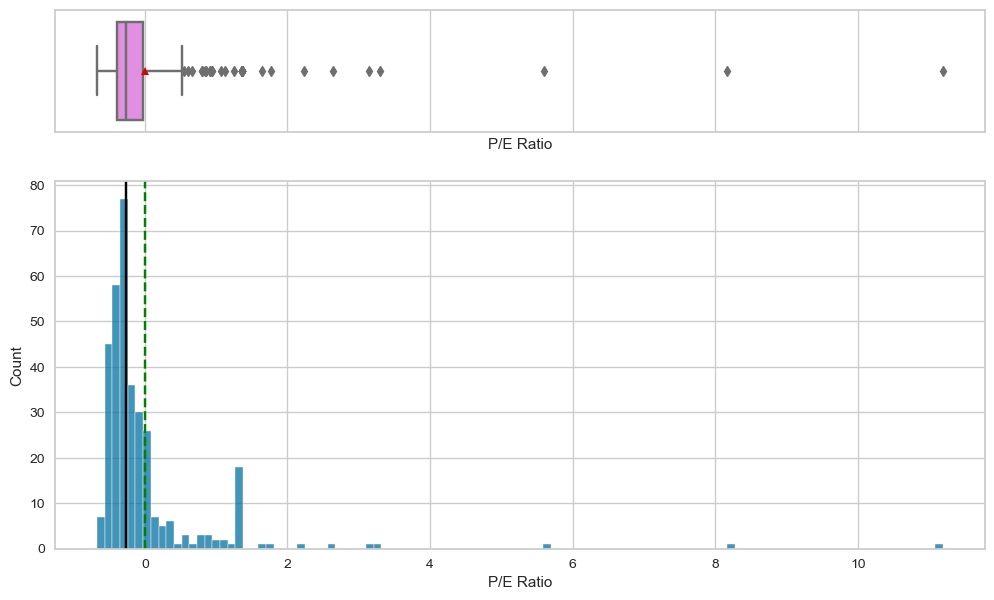

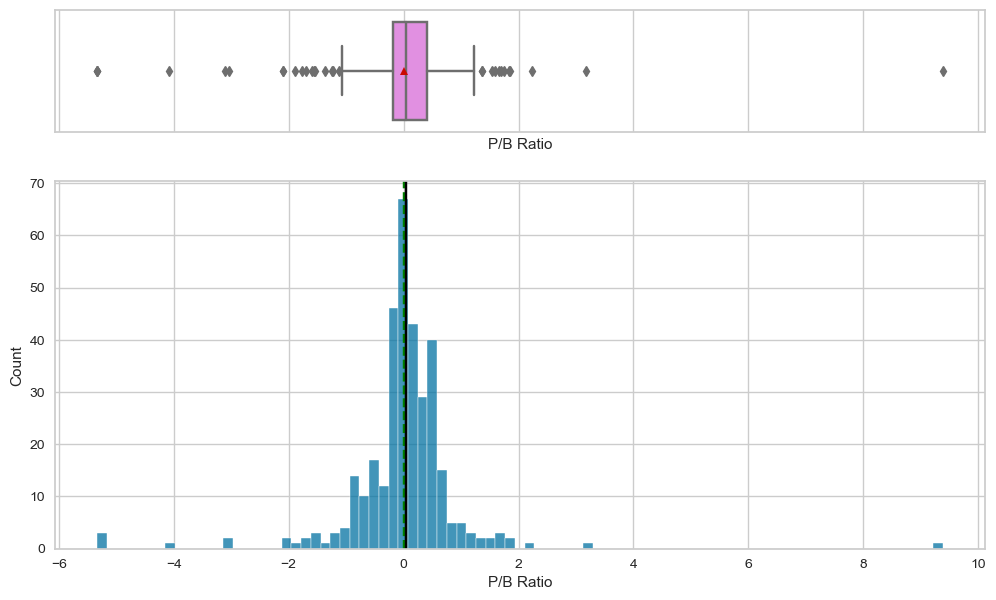

In [ ]:
for feature in subset_scaled_df[num_cols].columns:
    histogram_boxplot(subset_scaled_df, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define w

At first, it doesn't look like our scaling functions did anything to the data but that's because we're looking at the general shape, instead of looking at the x-axis. The purpose of the scaler function is to make it so the distributions of the data stays the same but each column has unit variance and zero for the mean. This makes it easier to cluster the data into groups and interpret what the k-means clustering is communicating to us. 

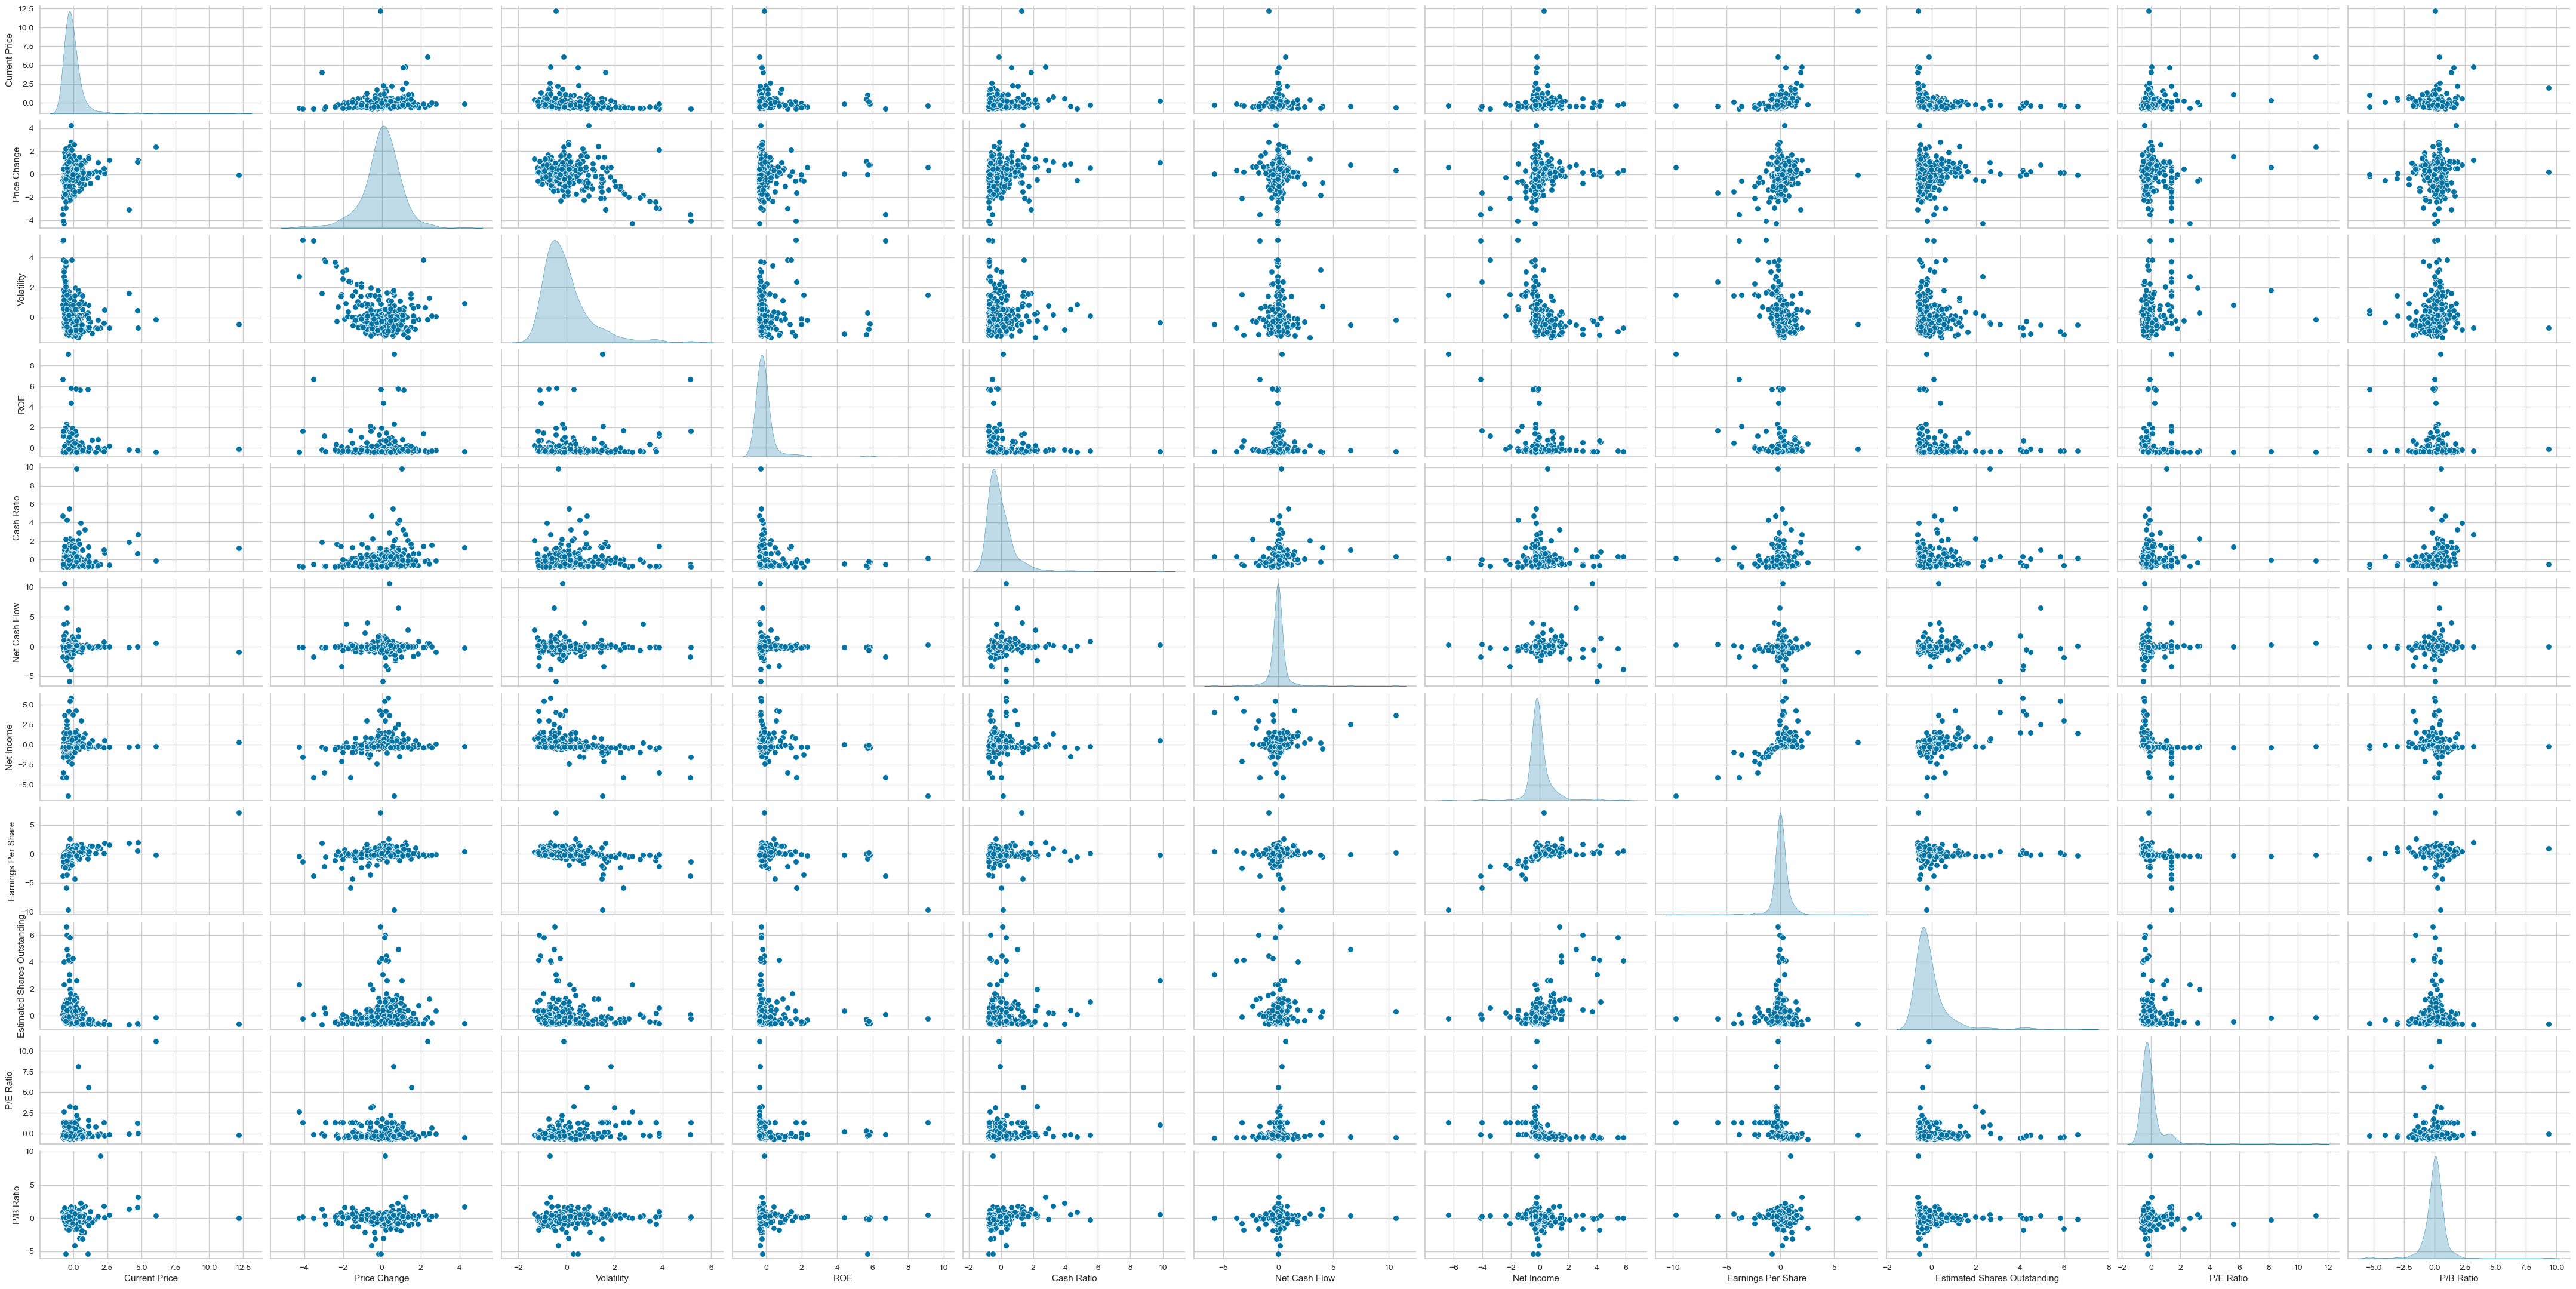

In [ ]:
# We make this pair plot to help us better visualize the various distributions of the scaled dataset, which also confirms our 
# earlier conclusions. 
sns.pairplot(subset_scaled_df, height=2,aspect=2 , diag_kind='kde')

## K-means Clustering

C:\Users\Neal Daniels\Anaconda 2\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.267596864267437
Number of Clusters: 4 	Average Distortion: 2.180235913619671
Number of Clusters: 5 	Average Distortion: 2.126829442356109
Number of Clusters: 6 	Average Distortion: 2.0600334919765
Number of Clusters: 7 	Average Distortion: 2.026857202076218
Number of Clusters: 8 	Average Distortion: 1.9991418588426675


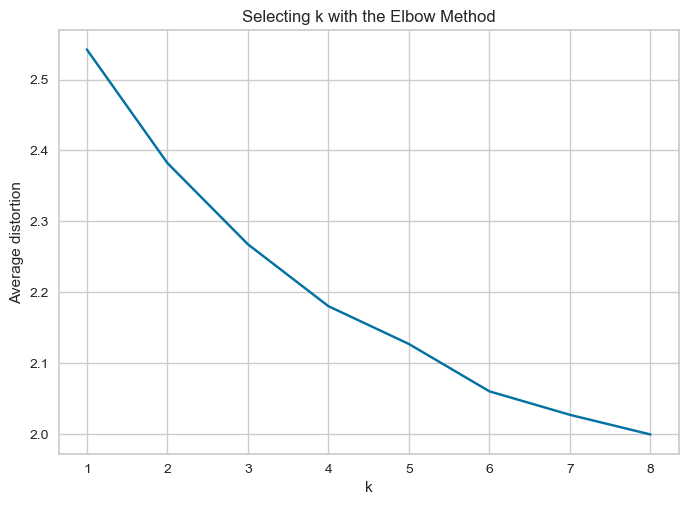

In [ ]:
# When making the clusters, we want to have a reasonable number but too high will
# lead to wrong conclusions. To start, we have a graph made of the clusters vs the
# Average distortion, looking for a section where average distortation is close to 1.

clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()


From the above graph and print out, we see that the average distribution is higher than 2 but we also see that there's points when the hints of an "elbow" in the graph. These points of interest are 4, 5, and 6 but we need to determine which K value we should use.  

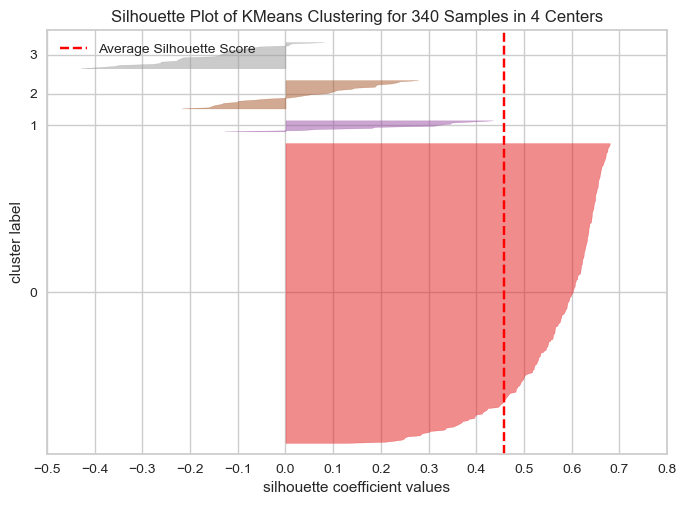

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients.
# We start with 4 being K. 
# We make a variable which is to visualize the silhouette coefficient, with 4 clusters.
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
# We fit the earlier variable with the scaled data
visualizer.fit(subset_scaled_df)
# We visualize the Silhouette coefficent and cluster label.  
visualizer.show()

From this graph, we see that there's some high negative silhouette coeffient values for some of these clusters. We'll need to compare this with the other graphs.

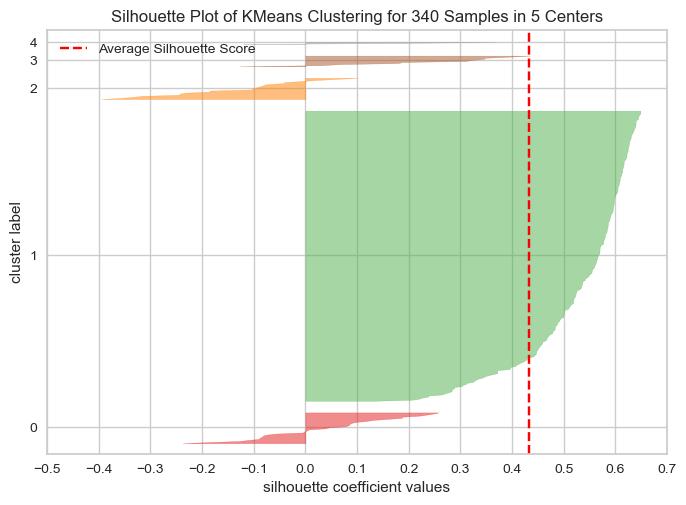

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients.
# We look at when the K value is 5. 
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

From this graph, we see some positive silhouette coefficient clusters but there's still some negative values associated with some clusters. Now, for the final graph. 

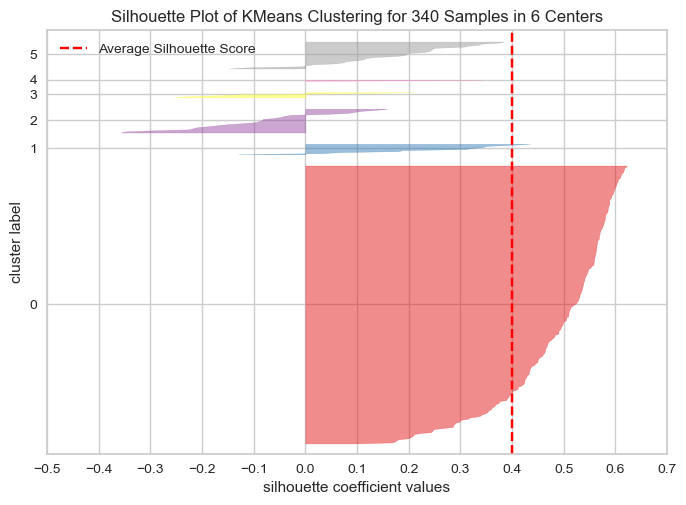

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients.
# In this case, we have 6 be the K value. 
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

From this graph, we see that there's still some negative silhoutte coefficient values in some of the clusters. However, they're smaller in size and length in this graph than in the other graphs and the clusters tend to be more postitive than negative. So, we'll say K= 6 and construct the final model. 

In [ ]:
# We make the variable "kmeans", which takes the KMeans() with the
#cluster value being 6.
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=6, random_state=1)

In [ ]:
# adding kmeans cluster labels to the original dataframe
df1["K_means_seg"] = kmeans.labels_

In [ ]:
# Now we move into cluster profiling to see what they
# tell us about each cluster.

# we make a variable named 'k_cluster_profile' which groups the df1 dataset by "K_means_seg" average values.
k_cluster_profile = df1.groupby("K_means_seg").mean()

C:\Users\Neal Daniels\AppData\Local\Temp\ipykernel_19260\876197988.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  k_cluster_profile = df1.groupby("K_means_seg").mean()


In [ ]:
# We make a column named "count_in_each_segment", which takes in the total number 
# 
k_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_seg")["Price Change"].count().values
)


In [ ]:
# let's display cluster profiles
k_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_seg,,,,,,,,,,,,
0,73.854019,5.116180,1.369515,35.262963,50.637037,4512725.925926,1512994744.444444,3.723870,430296731.305963,23.486573,-3.567829,270
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,111.612223,11.789464,1.787972,26.125000,290.083333,1450830291.666667,1499538625.000000,2.993750,700417074.282083,44.575135,13.972648,24
3,557.499989,17.445166,1.714325,12.000000,158.000000,116336500.000000,773142833.333333,12.396667,215235860.658333,225.136796,7.666157,6
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
5,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,27


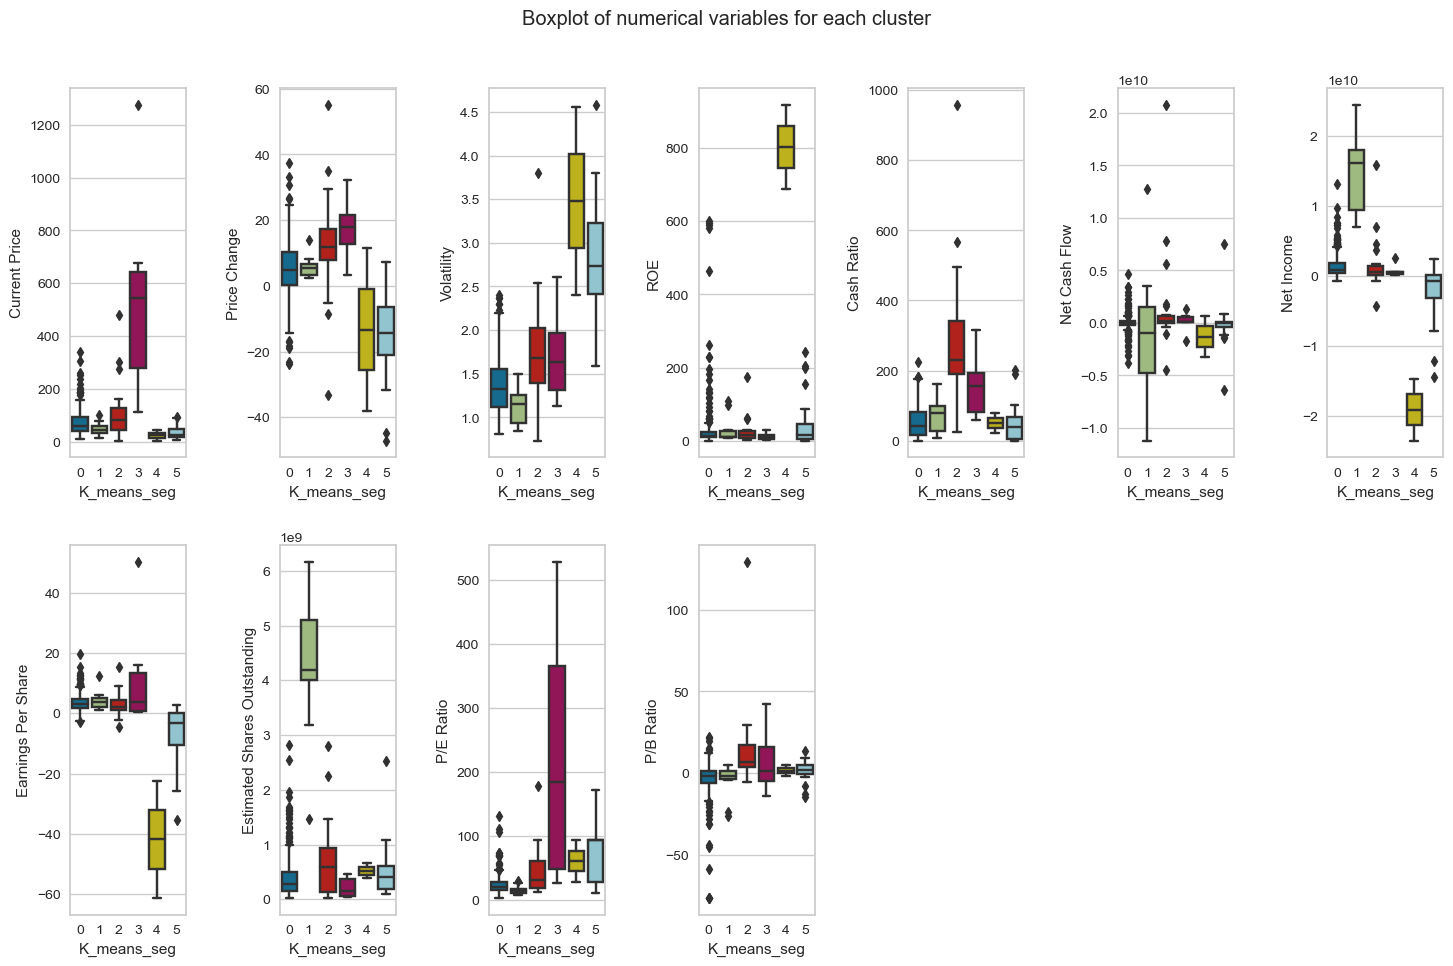

In [ ]:
#We establish the size of the following graph.
plt.figure(figsize=(15, 10))
# We make the title of the folllowing graph.
plt.suptitle("Boxplot of numerical variables for each cluster")


# Through this for loop, we go through each numerical column (num_cols, established earlier), to make a series of graphs
# Showing the k-means cluster distribution in each numerical column of interest.
for i, variable in enumerate(num_cols):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(data=df1, x="K_means_seg", y=variable)
# We specify the layout of the graphs. 
plt.tight_layout(pad=2.0)

- **Cluster 0**:
        - Low distribution of Current Price, less than 200. 
        - Price Change distribution small, all positive with hints of at least one outlier. Overall, less than 20. 
        - Volatility range is slightly under 1 to ~1.4. 
        - ROE distriution practically non-existant and close to zero. 
        - Cash Ratio is small in comparison with its neighbors but has a range from ~0 to ~180.
        - Earning Per Share is positive but its still a small distribution from approximately 1 to 8.
        - Estimated Shares Outstanding distribution has a range from 310 million to over 600 million. Has a larger distribution than its competitors and has a median at ~420 million.
        - The P/E Ratio is small, with the distribution beginning at ~10 to ~40.
        - The P/B Ratio has a median at 0, with outliers in both ends of the spectrum, though heavily negative.
- **Cluster 1**:
        - Small distribution of Current Price, practically non-existant.
        - Small but positive distribution of Price Change
        - Medium size distribution for Volatility, with the median at ~ 1.2.
        - Small ROE distribution, with some positive outliers.
        - Medium size distribution for Cash Ratio with a median ~ 90.
        - Large Net Cash Flow distribution, though the median is ~1.6.
        - Very small distribution in Earnings Per Share.
        - Large distribtuion in Estimated Shares Outstanding, with the median being ~4.1
        - Practically non-existant in P/E and P/B ratios.

- **Cluster 2**:
        - Small distribution of Current Price.
        - Medium size interquartile range of Price Change, with the median ~10.
        - Medium size distribution of Volatility, with ~1.75 as the median.
        - ROE values are practically non-existant.
        - Cash Ratio distribution has a large range, with the median being ~220.
        - Practically non-existant in the Net Cash Flow, Net Income, and Estimated Shares Outstanding values.
        - Estimated Shares Outstanding has a median of 0.5 with a decent size distribution.
        - Small distributions in the P/E and P/B ratios.

- **Cluster 3**:
        - Large Current Price distribution, with the median value of ~550.
        - Small distribution of Price Changes but has the highest of its competing clusters, with the median ~18.
        - Cash Ratio distribution is decent sized, with the median being ~180.
        - P/E Ratio has large distribtuion, with the median value being ~190.
        - P/B has a wide distribution, but has 0 for the median. 

- **Cluster 4**:
        - Large Price Change distribution, with the median being ~ -10.
        - Large Volatility distribtion, with the median ~ 3.5.
        - ROE distribtuion is medium size but is the highest of its neighboring clusters. Has the median of ~ 800.
        - Small Net Income Flow distribution, with the median being ~ -0.1.
        - Earning Per Share distribution of medium size, with the median being ~ -1.9.
        - Earning Shares Outstanding is descently sized, with median of ~-41.
        - P/E Ratio distribution is small, with the median of 50. 
- **Cluster 5**:
        - Price Change distribution is a descent size, with the median ~ 10. 
        - Descent size Volatility distribution, with the median at ~2.75.
        - Small distributions for the ROE and Cash Ratio columns.
        - Medium size distribution for the P/E Ratio but difficult to determine the median. 

## Hierarchical Clustering

In [ ]:
# Now, we'll take a look at hierachical clustering but we'll need to make sure which 
# method we should consider to use. To assist, we'll look at the different distance methods and linkage methods
# to see which gives us the best cophenetic correlation. 

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850003.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correl

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


From this, we know which cophenetic correlation of Euclidean distance and average distance gives the best results. This means that it has the best clustering method and dendrograms. However, we still need to compare the dendrograms to see what they tell us. 

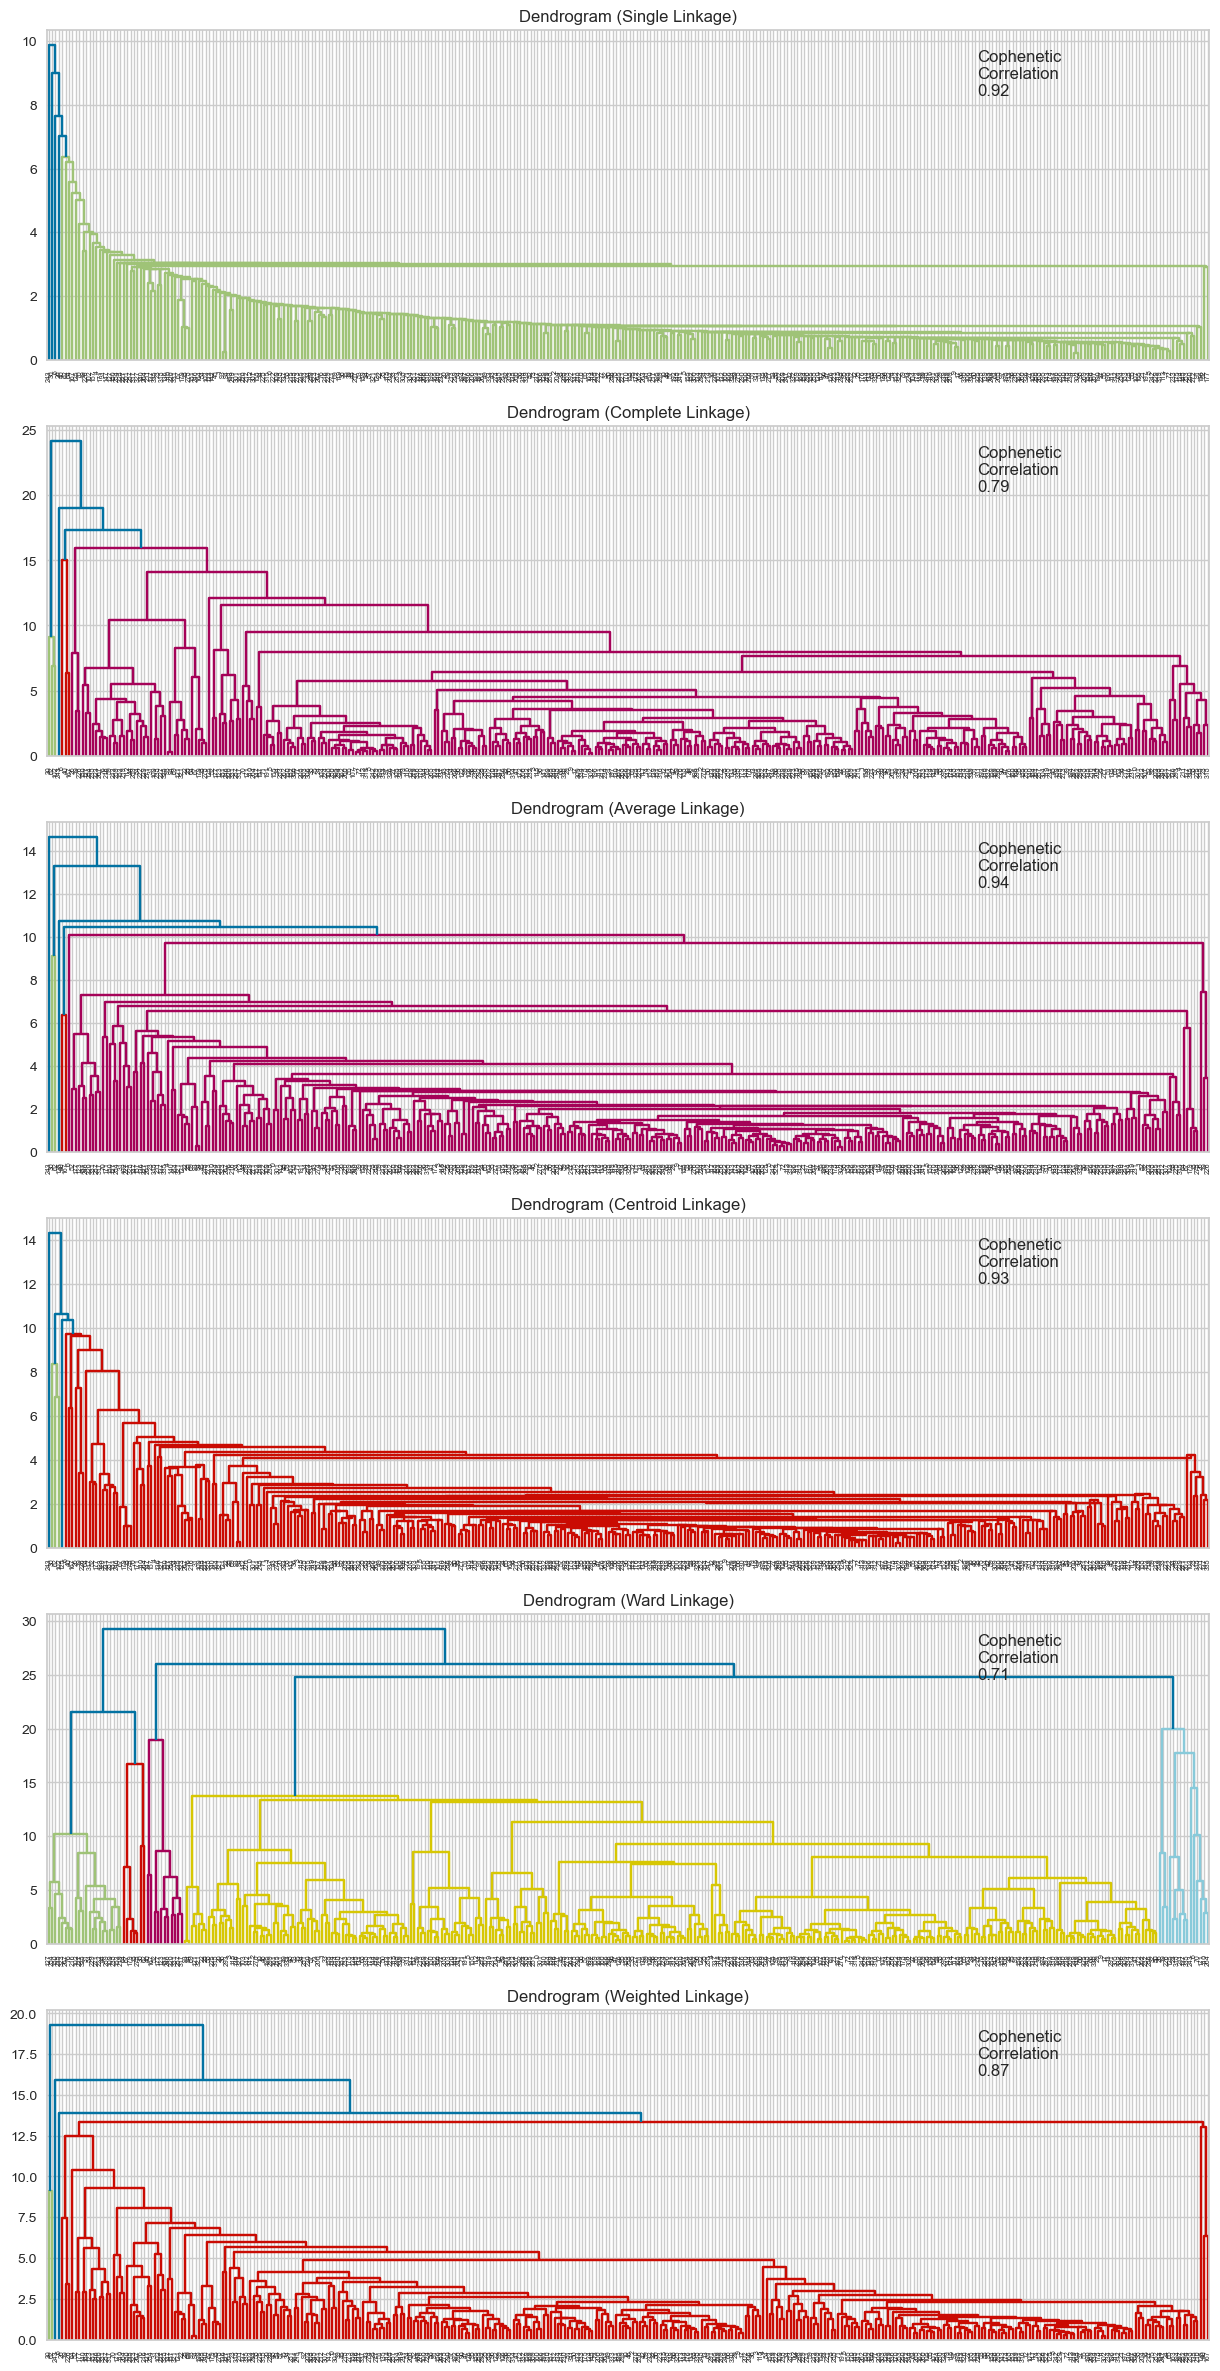

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation. For this part we use "Linkage" because we found that to
# give us the best results. 
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

Out of the dendrograms that we have, we see that the Ward linkage provides seperate and distinct clusters (each cluster indicated by a color). Because each color represents a different cluster, we can see that 6 would be the appropriate number of clusters. Plus, it has a high cophenetic correlation value, meaning that 

In [ ]:
# Now, we work on creating the final model
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=6)

In [ ]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

In [ ]:
# Now to do some cluster profiling
hc_cluster_profile = df1.groupby("HC_Clusters").mean()

# we make a column name "count_in_each_segments", to group the df1 dataset by the number of counts of "Price Change" and
# HC_Clusters. 
hc_cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Price Change"].count().values
)


#Highest cophenetic correlation is 0.9422540609560814, 
#which is obtained with Euclidean distance and average linkage.

C:\Users\Neal Daniels\AppData\Local\Temp\ipykernel_19260\3510042744.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hc_cluster_profile = df1.groupby("HC_Clusters").mean()


In [ ]:
# let's display cluster profiles
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(color = "lightblue", axis = 0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_seg,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,1.090909,11
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,1.142857,7
2,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,2.250000,12
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,0.189474,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,5.000000,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3.000000,3


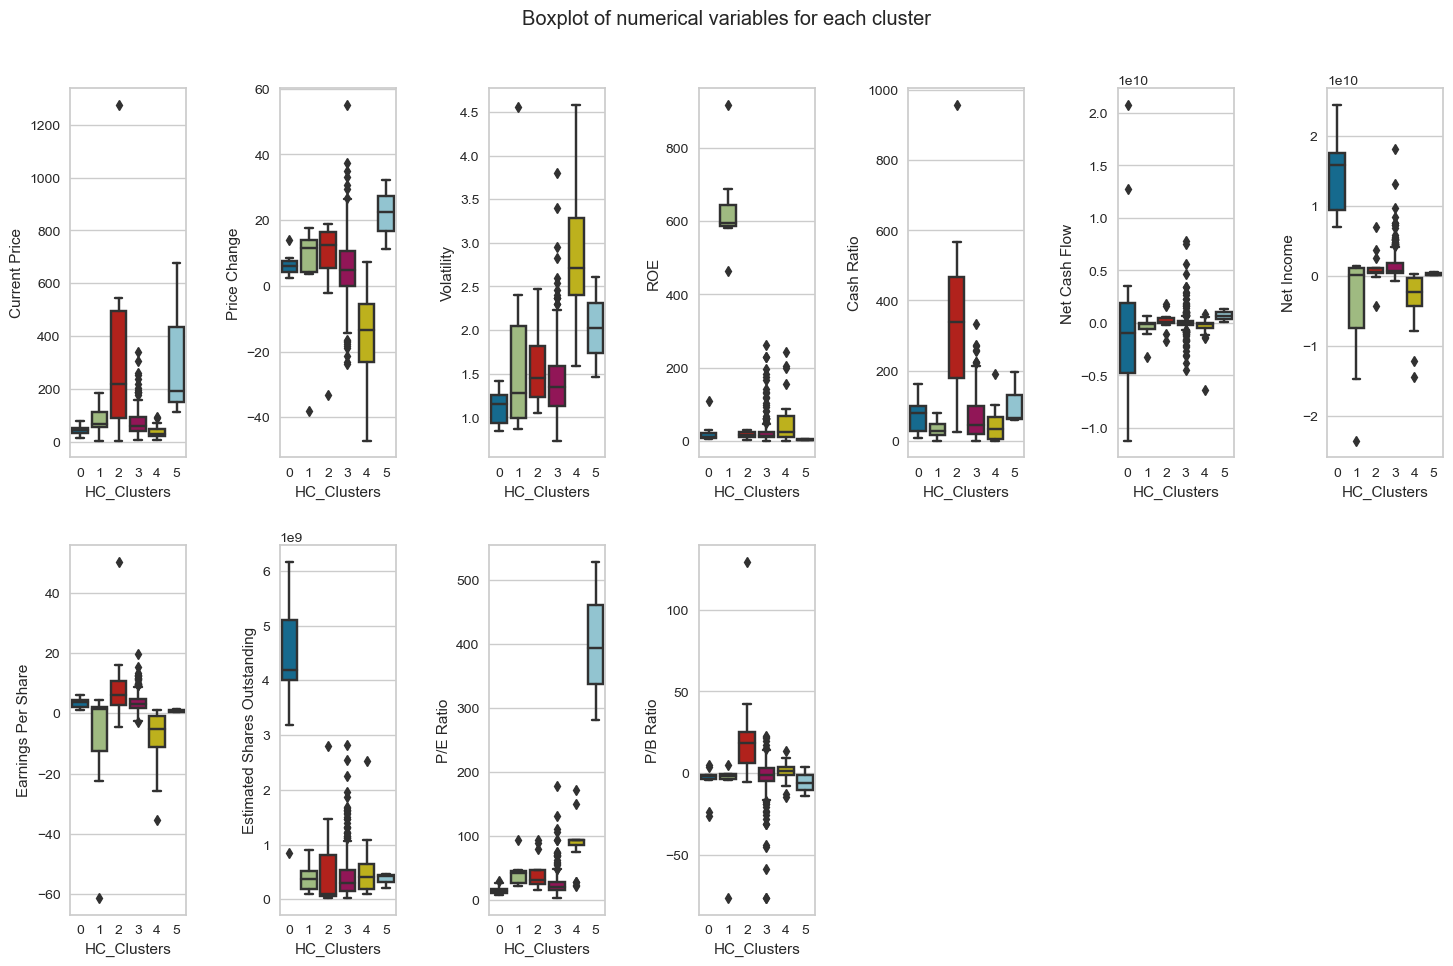

In [ ]:
# We establish the following graph size.
plt.figure(figsize=(15, 10))
# We make a subtitle for the collection of graphs we'll make.
plt.suptitle("Boxplot of numerical variables for each cluster")

# Through this for loop, we go through each numerical column (num_cols, established earlier), to make a series of graphs
# Showing the cluster distribution in each numerical column of interest.
for i, variable in enumerate(num_cols):
    plt.subplot(2, 7, i + 1)
    sns.boxplot(data=df1, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

- **Cluster 0**:
        - Low distribution of Current Price, less than 100. 
        - Price Change distribution small, all positive with hints of at least one outlier. Overall, less than 20. 
        - Volatility range is slightly under 1 to ~1.4. 
        - ROE distriution practically non-existant and close to zero. 
        - Cash Ratio is small in comparison with its neighbors but has a range from ~0 to ~180.
        - Earning Per Share is positive but its still a small distribution from approximately 1 to 8.
        - Estimated Shares Outstanding distribution has a range from 310 million to over 600 million. Has a larger distribution than its competitors and has a median at ~420 million.
        - The P/E Ratio is small, with the distribution beginning at ~10 to ~40.
        - The distribution for the P/B Ratio is practically very small, with negative and positive outliers surrounding it near zero. 
        
- **Cluster 1**:
      - Small distribution of Current Price, less than 200. 
        - Price Change distribution small, all positive with hints of at least one outlier. Overall, less than 20. 
        - Volatility range is slightly under 1 to ~1.4. 
        - ROE distriution practically non-existant and close to zero. 
        - Cash Ratio is small in comparison with its neighbors but has a range from ~0 to ~180.
        - Earning Per Share is positive but its still a small distribution from approximately 1 to 8.
        - Estimated Shares Outstanding distribution has a range from 310 million to over 600 million. Has a larger distribution than its competitors and has a median at ~420 million.
        - The P/E Ratio is small, with the distribution beginning at ~10 to ~40.
        - The distribution for the P/B Ratio is practically very small, with negative and positive outliers surrounding it near zero. 


- **Cluster 2**:
        - The median of Current price is slightly above 200, with a interquartile range of 0 to ~550.
        - Highest distribution for the Price Change column, with a medium size. Its median is approximately 16.
        - Volatility distribution is medium in size, with the median at 1.4.
        - Large Cash Ratio distribution, with the median at ~360.
    
- **Cluster 3**:
        - Small Price Change distribution, with the median at ~ 8.
        - Small Volatility distribution, with the median at ~1.4.
        - Small Cash Ratio distribtuion, with the median at ~50.
        - Distribution in other columns are minimal. 

- **Cluster 4**:
        - Large Price Change distribution, with the median at ~ -10.
        - Large Volatility distribution, with the median at ~ 2.75.
        - Small distribution of ROE.
        - Earning Per Share has negative distribution that is of medium size, with the median at ~ 8. 
        - Distribution in all other columns are minimal.

- **Cluster 5**:
        - Large Current Price distribution, with the median at ~ 200.
        - High but medium size of the Price Change distribution, with the median at ~22.
        - Medium size distribution of the volatility, with the median at ~2.
        - Small distribution for the Cash Ratio. 
        - Distribution in all other columns are minimal. 

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

In [ ]:
# In order to give any insights, we need to compare both cluster profiles. 

# let's display cluster profiles of K-Means
k_cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(color = "lightblue", axis = 0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_seg,,,,,,,,,,,,
0,73.854019,5.116180,1.369515,35.262963,50.637037,4512725.925926,1512994744.444444,3.723870,430296731.305963,23.486573,-3.567829,270
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,111.612223,11.789464,1.787972,26.125000,290.083333,1450830291.666667,1499538625.000000,2.993750,700417074.282083,44.575135,13.972648,24
3,557.499989,17.445166,1.714325,12.000000,158.000000,116336500.000000,773142833.333333,12.396667,215235860.658333,225.136796,7.666157,6
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
5,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,27


In [ ]:
# Now for the cluster profiles of Hierarchical clusters
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(color = "lightblue", axis = 0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_seg,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,1.090909,11
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,1.142857,7
2,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,2.250000,12
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,0.189474,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,5.000000,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3.000000,3


- Both agree that Cluster 4 has the mininium Current price but disagree as to which cluster has the maximum. 
- Both charts agree that cluster 4 has the maximum Volatility value.
- Both disagree on the clusters associated with maximum and minimum ROE.
- Both agree that cluster 2 has the maximum Cash Ratio.


- Hierarchical Clustering took less time for execution because we didn't need to run different tests determining how we should cluster the data. Instead, we ran some numbers to determine which linkage method would work best and then looked at the charts of the dendrograms to determine the number of clusters we should use in our final model. 
- The hierachical clustering method is more distinct in clusters because we can visualise the distances between each point and each cluster. 
- In the K-Means clusters we have clusters one cluster had 270 data points while the rest were below 30 and went as low as 2 data points. In the Hierachical clustering method, we see a similar case, where one cluster has 285 data points while the other clusters had a minimum of 3 and a maximum of 22. None of the clusters in K-Means matched that of Hierachical clustering in terms of data points.  
- In both methods (K-means and Hierarchical clustering), we get the same number to cluster the data by. However, the later method makes it easier to determine which method to use and how many clusters to use. However, we need to keep in mind that just because it worked well in this case, it won't work well in all cases.

## Actionable Insights and Recommendations

- 

In [ ]:
# In order to give any recommendations, we need to see what insights both graphs

# let's display cluster profiles of K-Means, highlighting the maximums and minimums in each column. 
k_cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(color = "lightblue", axis = 0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_seg,,,,,,,,,,,,
0,73.854019,5.116180,1.369515,35.262963,50.637037,4512725.925926,1512994744.444444,3.723870,430296731.305963,23.486573,-3.567829,270
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,111.612223,11.789464,1.787972,26.125000,290.083333,1450830291.666667,1499538625.000000,2.993750,700417074.282083,44.575135,13.972648,24
3,557.499989,17.445166,1.714325,12.000000,158.000000,116336500.000000,773142833.333333,12.396667,215235860.658333,225.136796,7.666157,6
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
5,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,27


In [ ]:
# We then display cluster profiles of Heirarchical clusters, highlighting the maximums and minimums in each column. 
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(color = "lightblue", axis = 0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_seg,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,1.090909,11
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,1.142857,7
2,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,2.250000,12
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,0.189474,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,5.000000,22
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3.000000,3


- In both cases of clustering, we see that the maximums of Current Price and and Price Change are in the same cluster. Thus, we can reasonably assume that the two variables share a postive correlation relationship.
- Net Cash Flow,  Net Income, and Earnings Per Share have minimum values in the same respective cluster. This could show that if a stock has a small Net Cash Flow/Net Income/Earnings Per Share, then their neighboring columns will be the same. Thus, we should be looking at stocks that are relatively decent on all three columns. 
- Both agree that Cluster 1 has the minimum P/B Ratio. It might be worth analyzing what data in both clustering methods lead to that same conclusion. 
- Both tables agree that cluster 2 has the maximum Cash Ratio, meaning that it has some data points that are of interest.